# Credit Card Fraud Detection Capstone Project

### Problem Statement:

Fraudulent activities have increased more in recent times, due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day. Every fraudulent credit card transaction that occur is a direct financial loss to the bank as the bank is responsible for the fraud transactions as well it also affects the overall customer satisfaction adversely. So there is a dire need to improve risk management level in an effective way. This can be achieved by building an accurate & easy credit card risk monitoring system. There are many Machine learning algorithms that can be used for this purpose. The main aim of this project is to build a user model that best identifies fraud cases.

## The project pipeline can be briefly summarized in the following four steps:

1. Data Understanding: We 1st loaded the data and observed the features present in it

2. Exploratory data analytics (EDA): We performed univariate and bivariate analyses of the data to observe relationship between Amout and Time with class. Dataset is checked for skewness and power tranform is used to mitigate the same, as it might cause problems during the model-building phase.

3. Train/Test Split: We performed train/test split, to check the performance of our models with unseen data. Here, for validation, you have use the Stratified k-fold cross-validation method.

4. Model-Building/Hyperparameter Tuning: This is the final step at which we tried different models and fine-tuned their hyperparameters until we g0t the desired level of performance. For hyperparameter tuning, random and grid search are the two popular methods available in scikit-learn in the form of RandomiszedSearchCV and GridSearchCV, respectively.

### Importing the Libraries

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 500)

### Data understanding

In [4]:
df = pd.read_csv("creditcard.csv")
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

### Handling missing values

In [8]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
Time     0.0
V16      0.0
Amount   0.0
V28      0.0
V27      0.0
V26      0.0
V25      0.0
V24      0.0
V23      0.0
V22      0.0
V21      0.0
V20      0.0
V19      0.0
V18      0.0
V17      0.0
V15      0.0
V1       0.0
V14      0.0
V13      0.0
V12      0.0
V11      0.0
V10      0.0
V9       0.0
V8       0.0
V7       0.0
V6       0.0
V5       0.0
V4       0.0
V3       0.0
V2       0.0
Class    0.0

 - We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

### Checking the distribution of the classes

In [9]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [10]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [11]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

- We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

### Exploratory Data Analysis

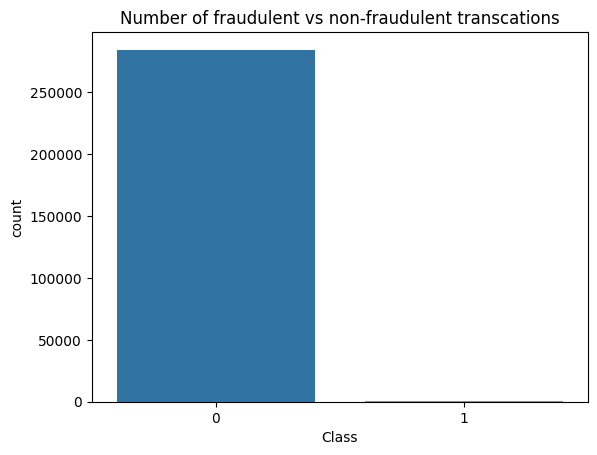

In [12]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

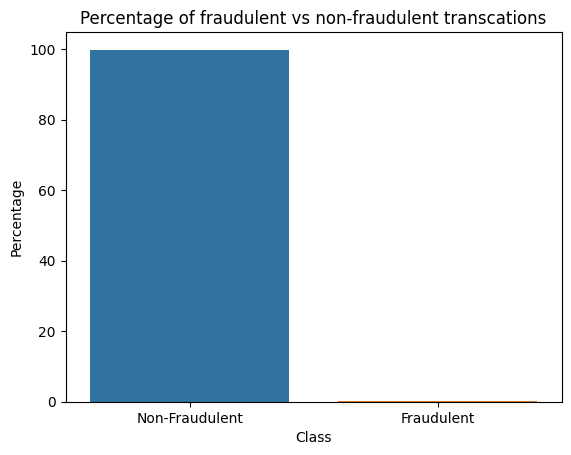

In [13]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

We can see that 98% of the transactions are non fraudulent, where as apporx 2% of transactions are fraudulent. Hence we can see that this project has a Data Imbalance problem.

### Outliers treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

### Observe the distribution of classes with time

In [14]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

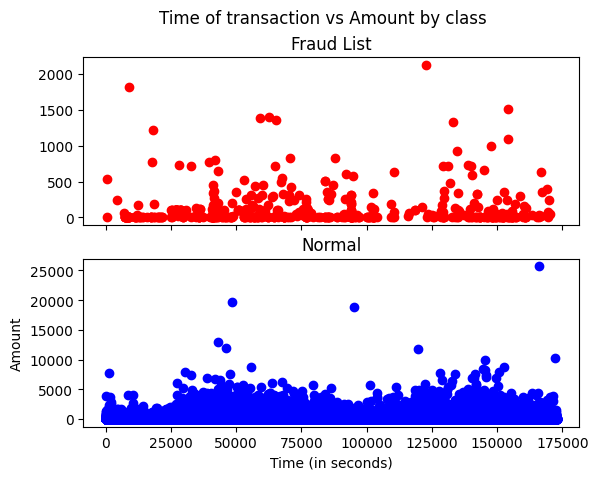

In [15]:
# Create a scatter plot to observe the distribution of classes with time and amount
# time vs Amount

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(data_fraud.Time, data_fraud.Amount, color = 'red')
ax1.set_title('Fraud List')

ax2.scatter(data_non_fraud.Time, data_non_fraud.Amount, color = 'blue')
ax2.set_title('Normal')

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

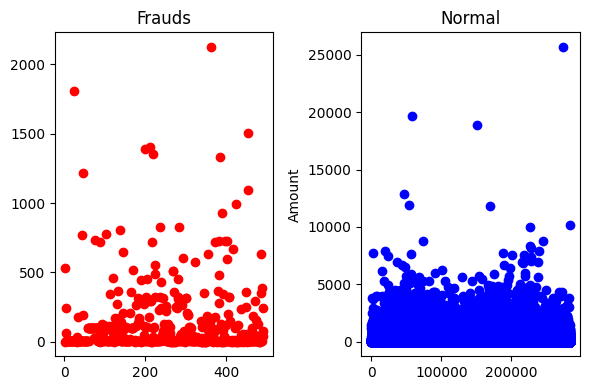

In [16]:
# Create a scatter plot to observe the distribution of classes with Amount
#plotting the dataset considering the class
color = {1:'red', 0:'yellow'}

fig,axes = plt.subplots(1,2, figsize = (6,4))
# fig.text('Amount', va = 'centre', rotation = 'vertical')

axes[0].scatter(list(range(1,data_fraud.shape[0] + 1)), data_fraud.Amount,color='red')
axes[0].set_title('Frauds')
plt.ylabel("Amount")

axes[1].scatter(list(range(1, data_non_fraud.shape[0] + 1)), data_non_fraud.Amount,color='blue')
axes[1].set_title('Normal')
plt.ylabel("Amount")

plt.tight_layout()
plt.show()

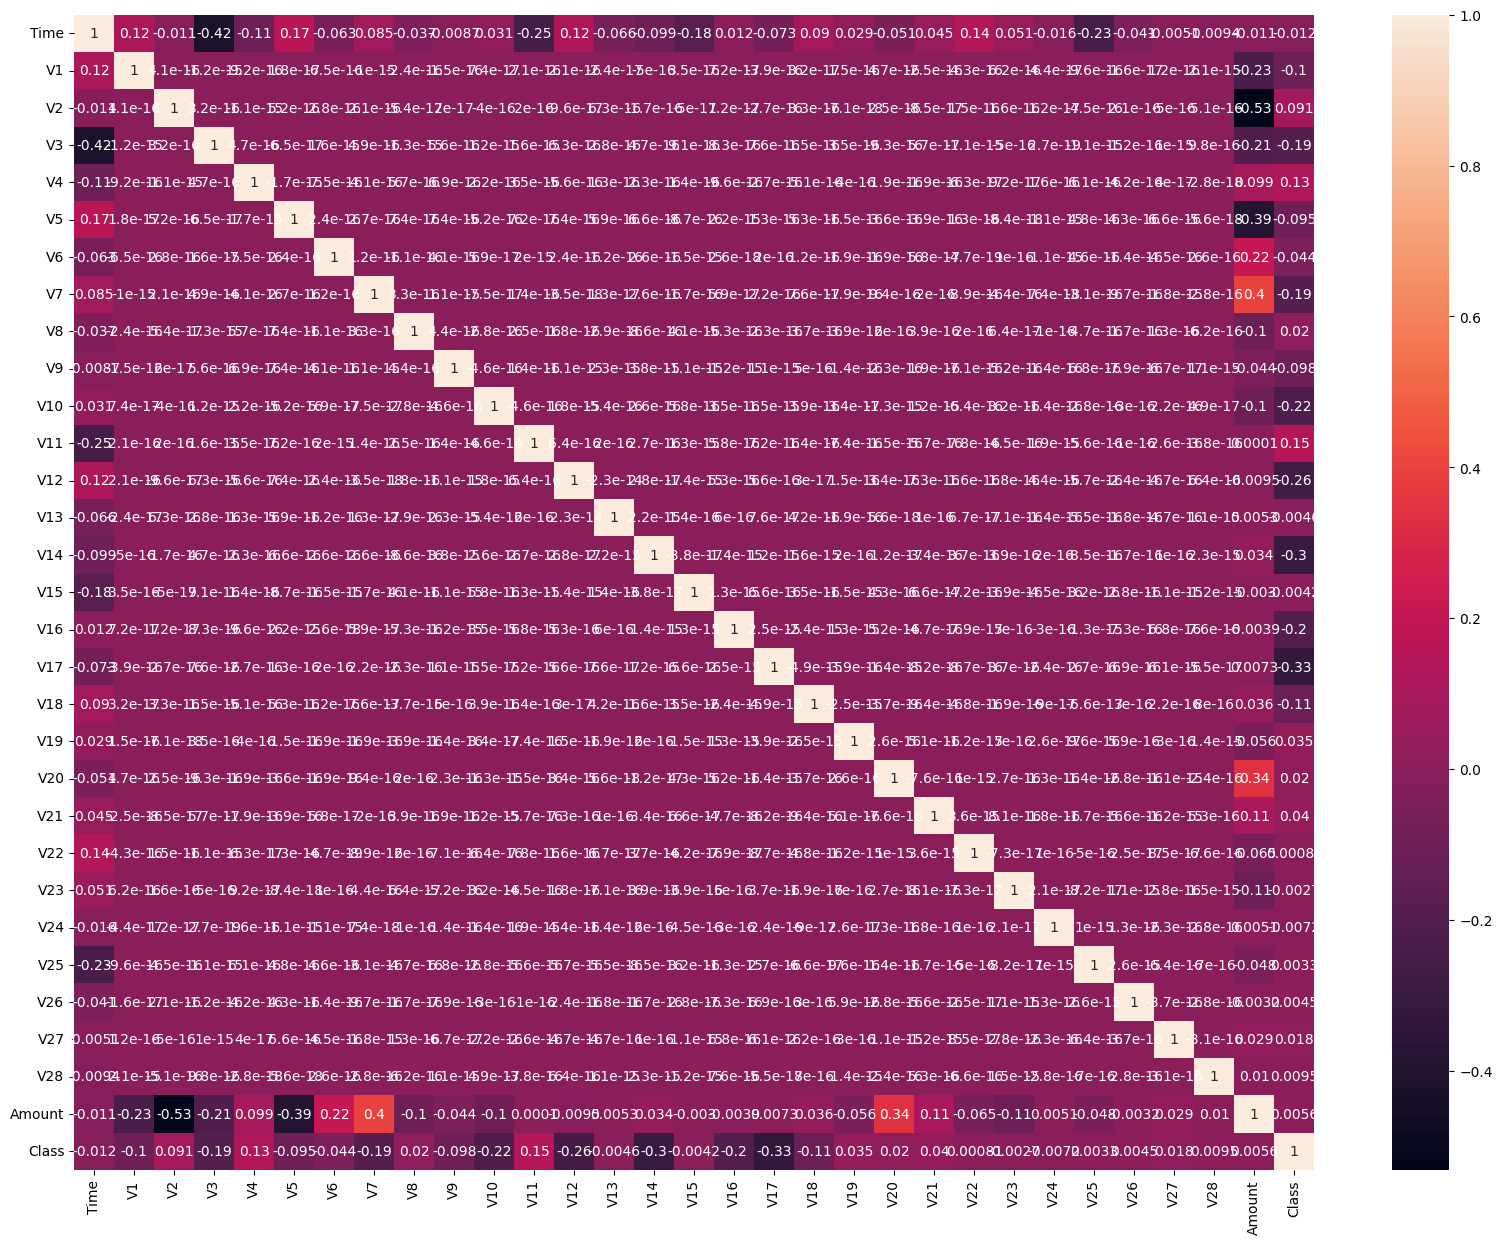

In [17]:
# checking how variables are correlated
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

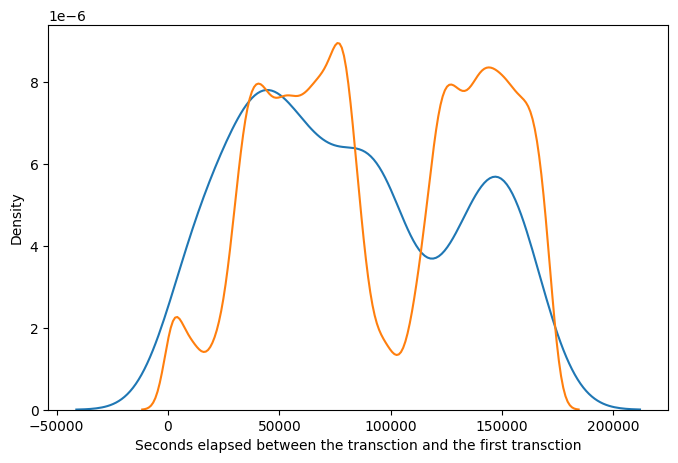

In [18]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

Analysis:
- We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

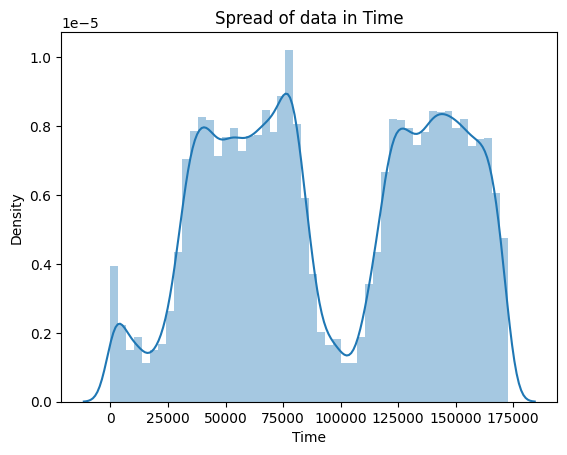

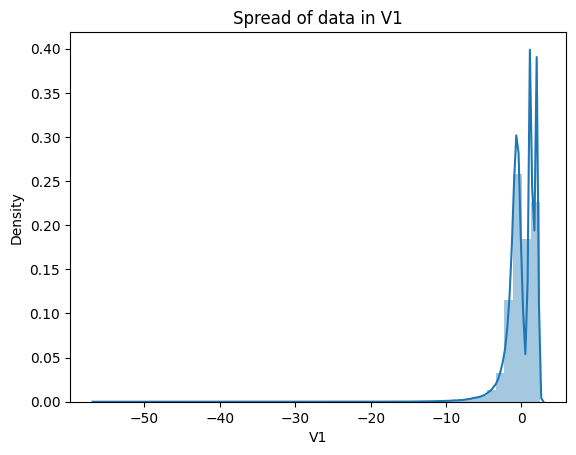

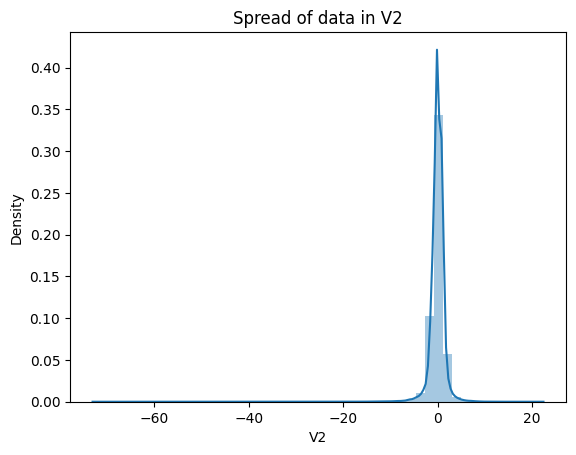

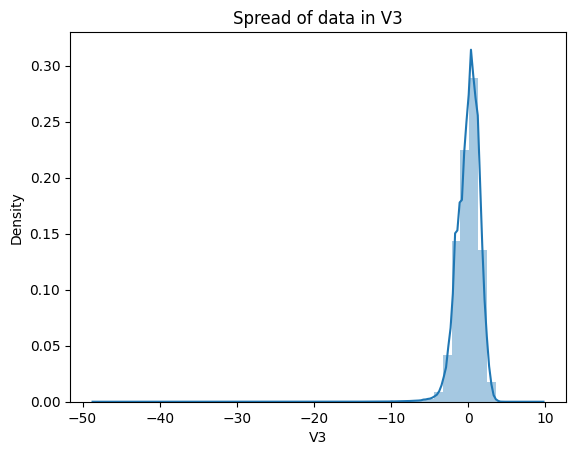

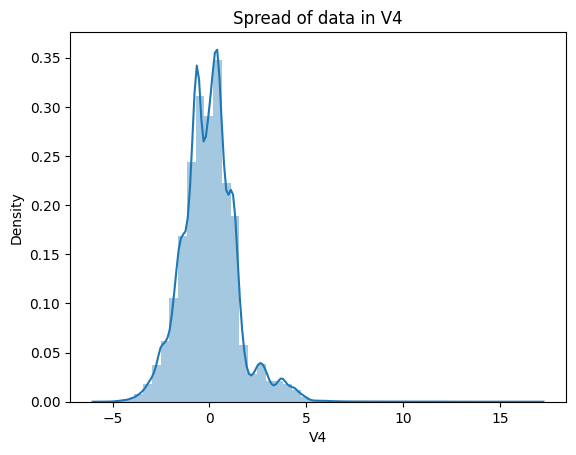

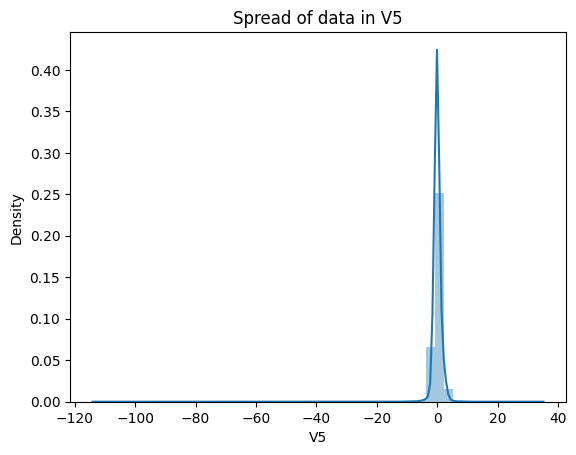

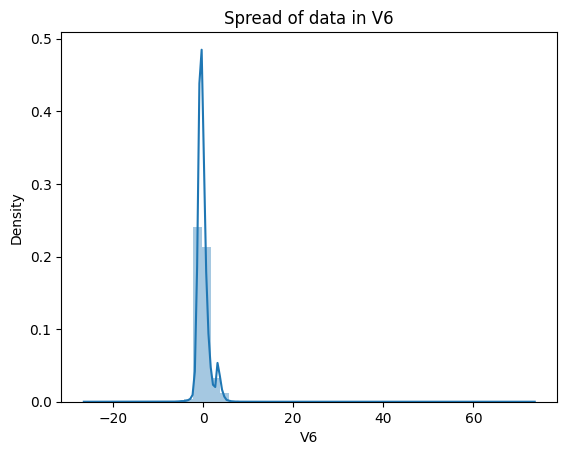

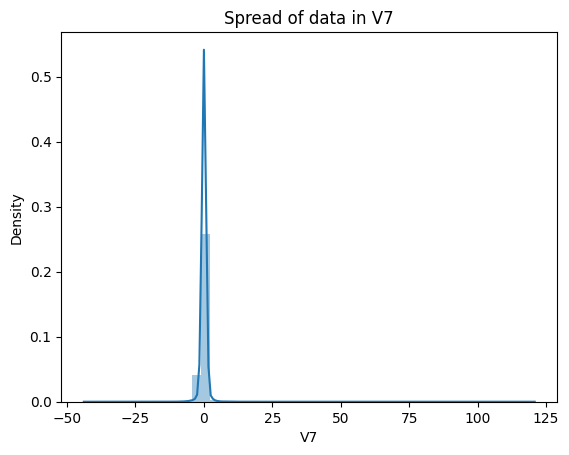

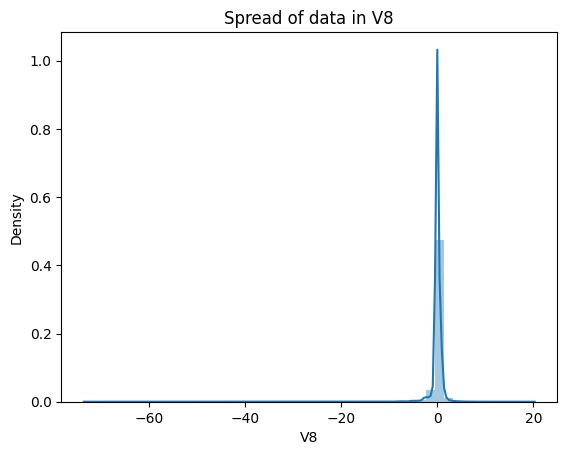

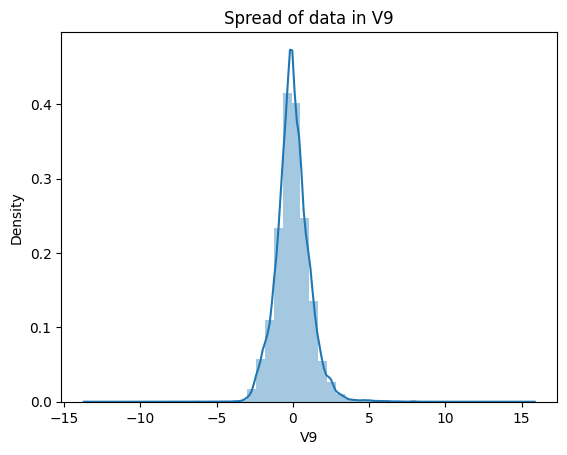

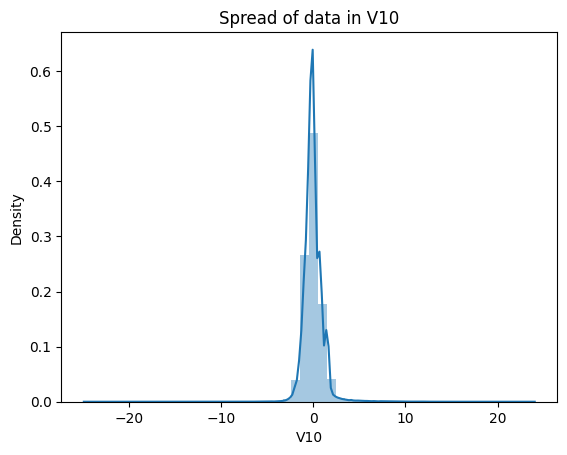

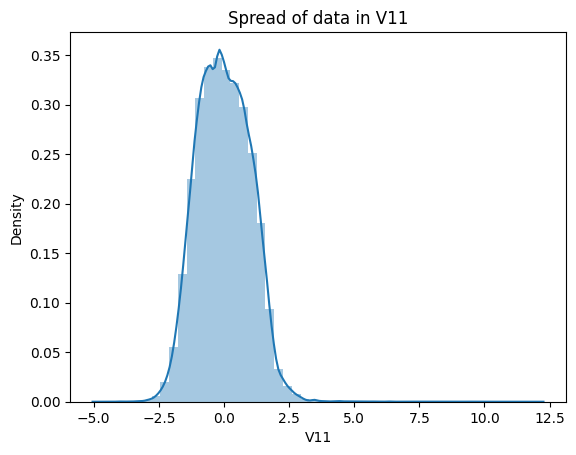

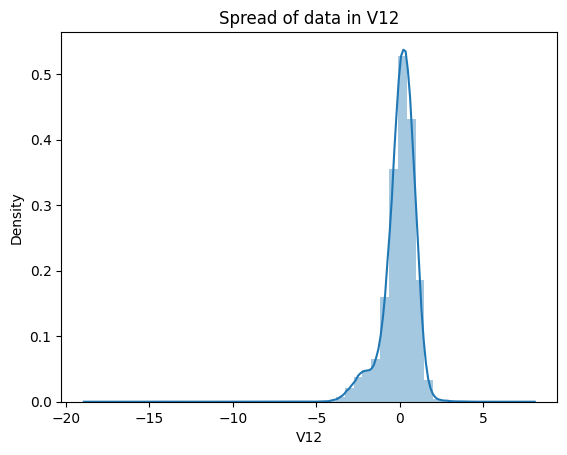

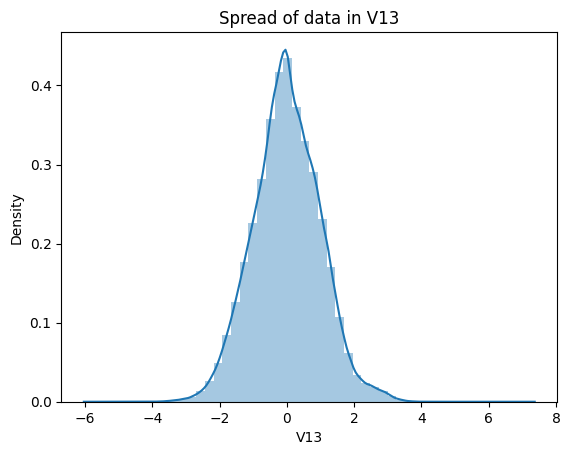

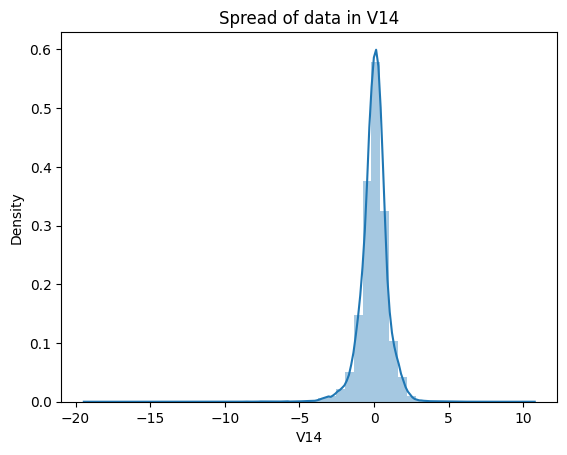

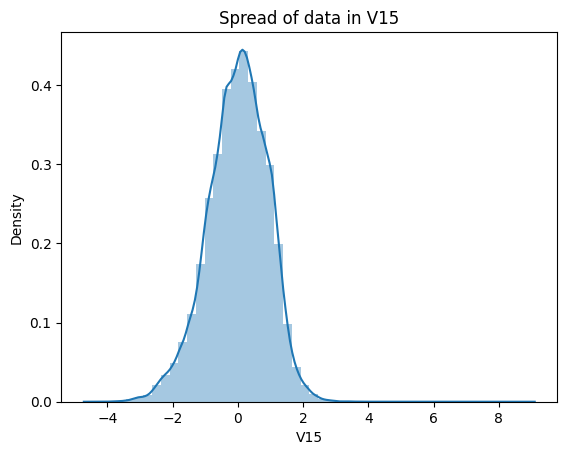

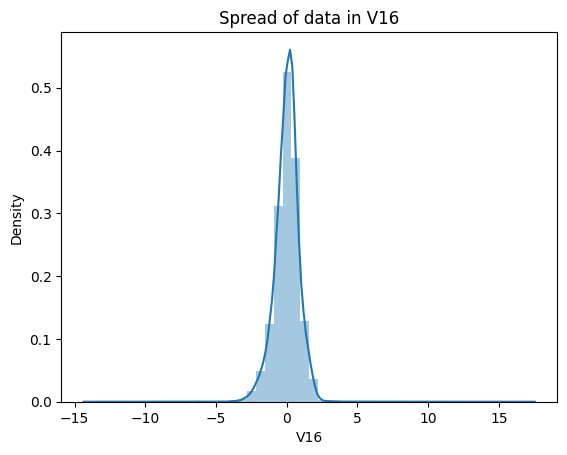

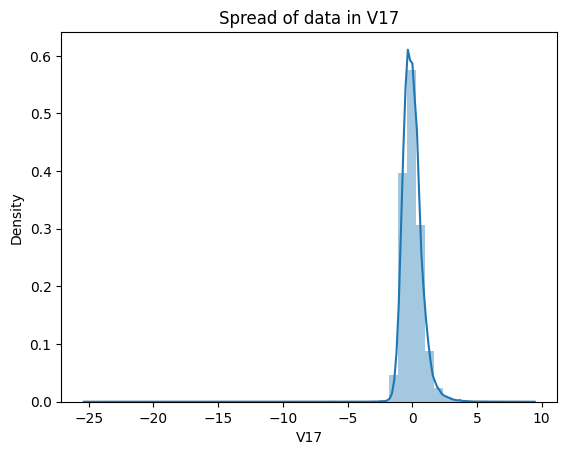

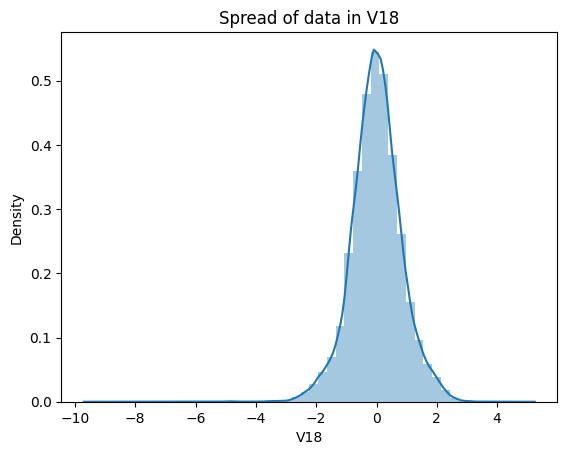

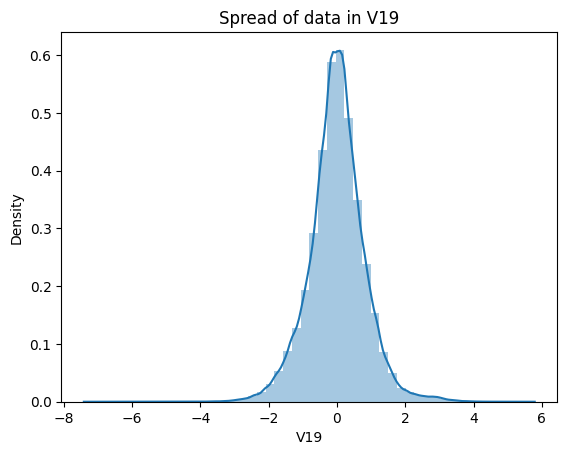

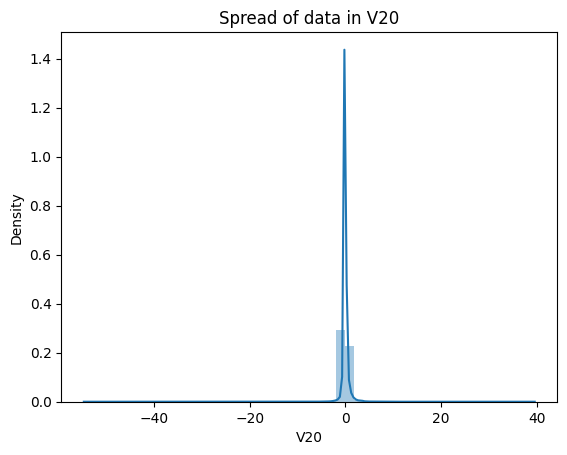

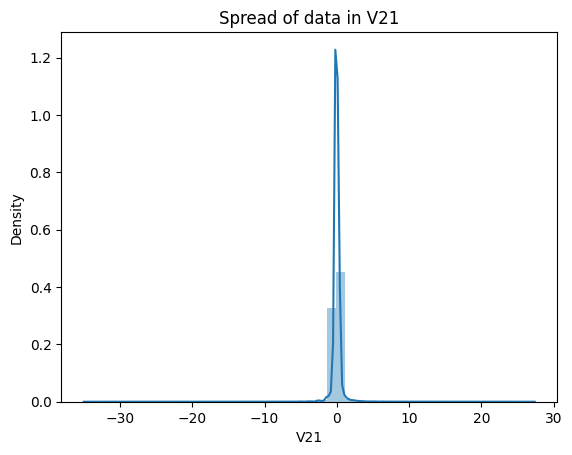

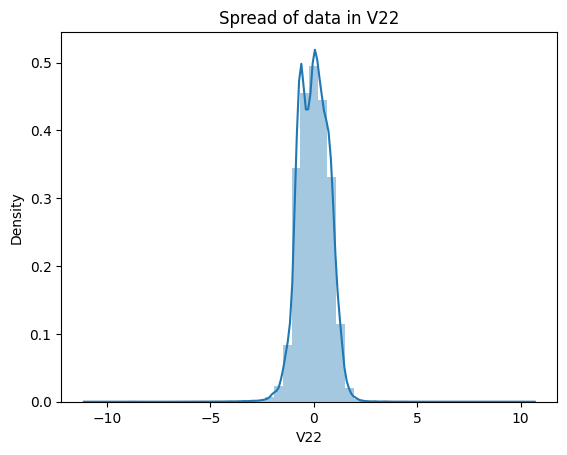

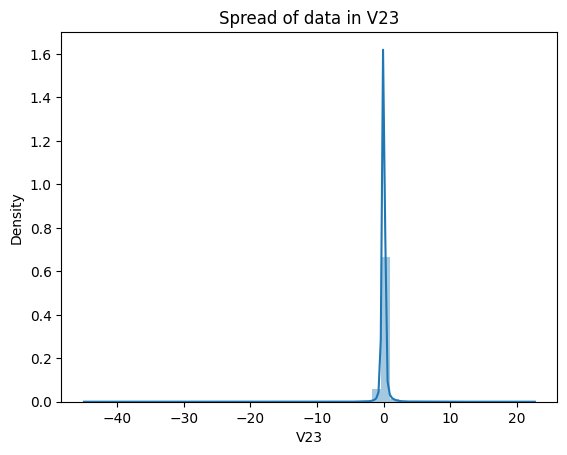

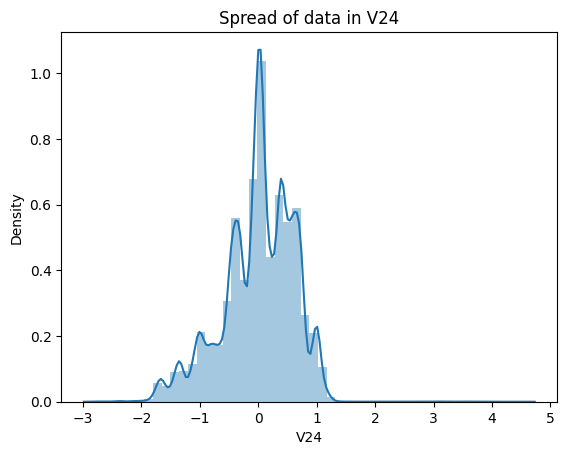

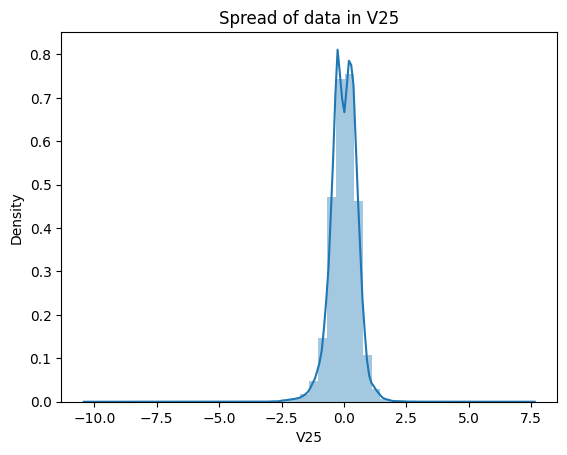

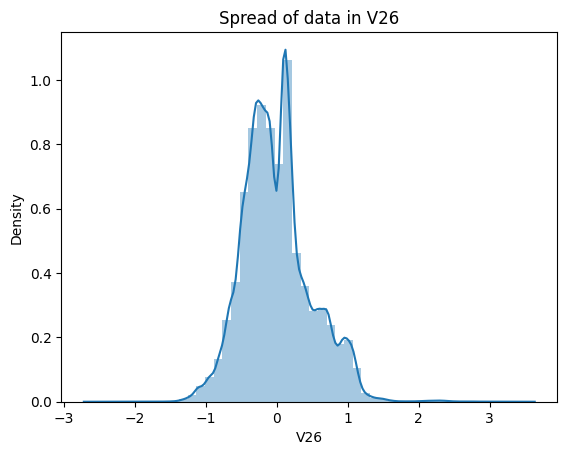

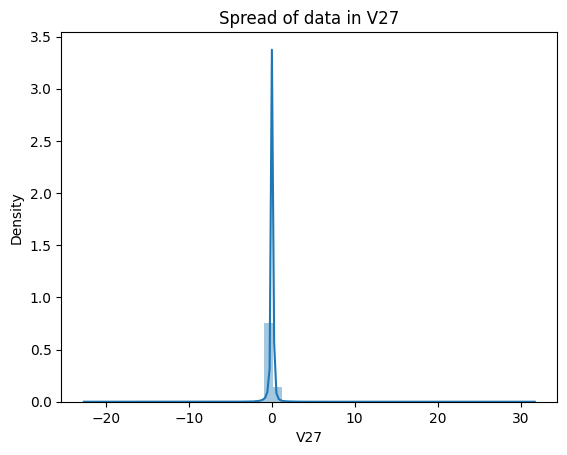

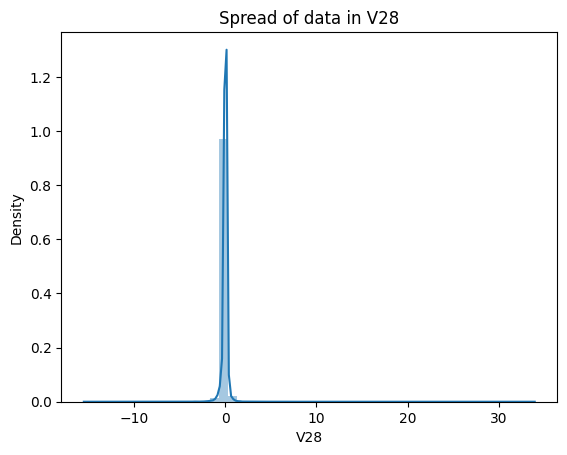

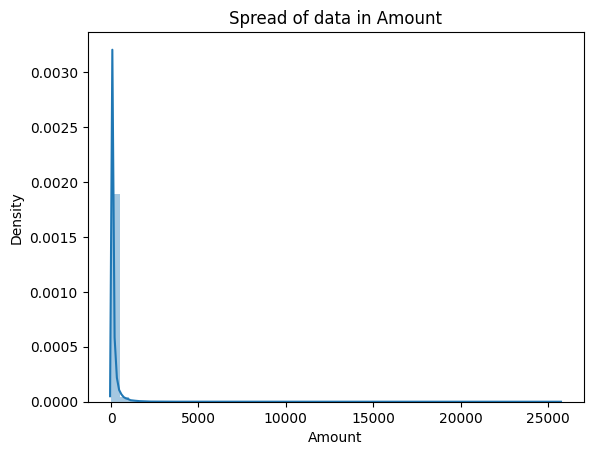

In [19]:
#Lets check how our data is distributed
for i in df.columns:
    if i != 'Class':
        sns.distplot(df[i],kde = True)
        plt.title('Spread of data in'+' '+ i)
        plt.xlabel(i)
        plt.show()

- Per Observation Skewed data can impair the interpretation of our predictive model if we don’t address it correctly.
- Before building models, let us use Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian.

### Data Preparation

In [20]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

#### Observe the distribution of classes with amount

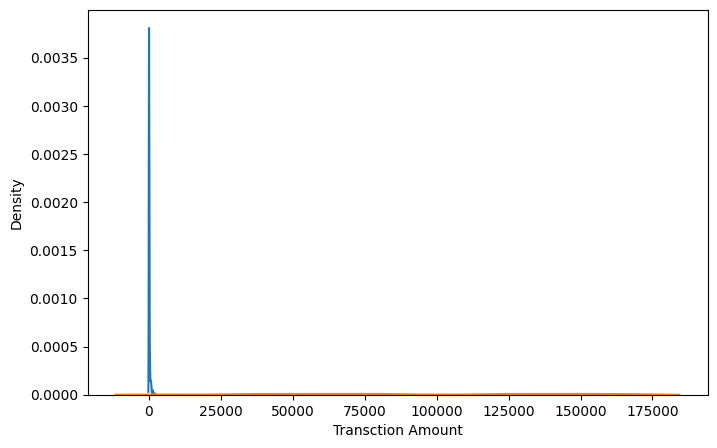

In [21]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

Analysis:
- We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

### Train-Test Split

In [22]:
# Import library
from sklearn.model_selection import train_test_split

In [23]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [24]:
# Putting target variable to y
y = df['Class']

In [25]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [26]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Feature Scaling

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [27]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [28]:
# Instantiate the Scaler
scaler = StandardScaler()

In [29]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [30]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
201788  2.023734 -0.429219 -0.691061 -0.201461 -0.162486  0.283718 -0.674694   
179369 -0.145286  0.736735  0.543226  0.892662  0.350846  0.089253  0.626708   
73138  -3.015846 -1.920606  1.229574  0.721577  1.089918 -0.195727 -0.462586   
208679  1.851980 -1.007445 -1.499762 -0.220770 -0.568376 -1.232633  0.248573   
206534  2.237844 -0.551513 -1.426515 -0.924369 -0.401734 -1.438232 -0.119942   

              V8        V9       V10       V11       V12       V13       V14  \
201788  0.192230  1.124319 -0.037763  0.308648  0.875063 -0.009562  0.116038   
179369 -0.049137 -0.732566  0.297692  0.519027  0.041275 -0.690783  0.647121   
73138   0.919341 -0.612193 -0.966197  1.106534  1.026421 -0.474229  0.641488   
208679 -0.539483 -0.813368  0.785431 -0.784316  0.673626  1.428269  0.043937   
206534 -0.449263 -0.717258  0.851668 -0.497634 -0.445482  0.324575  0.125543   

             V15       V16       V17       V18       V19       V20       V21  \
201788  0.086537  0.628337 -0.997868  0.482547  0.576077 -0.171390 -0.195207   
179369  0.526333 -1.098558  0.511739  0.243984  3.349611  0.206709 -0.124288   
73138  -0.430684 -0.631257  0.634633 -0.718062 -0.039929  0.842838  0.274911   
208679 -0.309507 -1.805728 -0.012118  0.377096 -0.658353 -0.196551 -0.406722   
206534  0.266588  0.802640  0.225312 -1.865494  0.621879 -0.045417  0.050447   

             V22       V23       V24       V25       V26       V27       V28  \
201788 -0.477813  0.340513  0.059174 -0.431015 -0.297028 -0.000063 -0.046947   
179369 -0.263560 -0.110568 -0.434224 -0.509076  0.719784 -0.006357  0.146053   
73138  -0.319550  0.212891 -0.268792  0.241190  0.318445 -0.100726 -0.365257   
208679 -0.899081  0.137370  0.075894 -0.244027  0.455618 -0.094066 -0.031488   
206534  0.125601  0.215531 -0.080485 -0.063975 -0.307176 -0.042838 -0.063872   

          Amount  
201788 -0.345273  
179369 -0.206439  
73138   0.358043  
208679  0.362400  
206534 -0.316109

Scaling the test set
- We don't fit scaler on the test set. We only transform the test set.

In [31]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
49089   1.229452 -0.235478 -0.627166  0.419877  1.797014  4.069574 -0.896223   
154704  2.016893 -0.088751 -2.989257 -0.142575  2.675427  3.332289 -0.652336   
67247   0.535093 -1.469185  0.868279  0.385462 -1.439135  0.368118 -0.499370   
251657  2.128486 -0.117215 -1.513910  0.166456  0.359070 -0.540072  0.116023   
201903  0.558593  1.587908 -2.368767  5.124413  2.171788 -0.500419  1.059829   

              V8        V9       V10       V11       V12       V13       V14  \
49089   1.036103  0.745991 -0.147304 -0.850459  0.397845 -0.259849 -0.277065   
154704  0.752811  1.962566 -1.025024  1.126976 -2.418093  1.250341 -0.056209   
67247   0.303698  1.042073 -0.437209  1.145725  0.907573 -1.095634 -0.055080   
251657 -0.216140  0.680314  0.079977 -1.705327 -0.127579 -0.207945  0.307878   
201903 -0.254233 -1.959060  0.948915 -0.288169 -1.007647  0.470316 -2.771902   

             V15       V16       V17       V18       V19       V20       V21  \
49089  -0.766810 -0.200946 -0.338122  0.006032  0.477431 -0.057922 -0.170060   
154704 -0.736695  0.014783  1.890249  0.333755 -0.450398 -0.147619 -0.184153   
67247  -0.621880 -0.191066  0.311988 -0.478635  0.231159  0.437685  0.028010   
251657  0.213491  0.163032 -0.587029 -0.561292  0.472667 -0.227278 -0.357993   
201903  0.221958  0.354333  2.603189  1.092576  0.668084  0.249457 -0.035049   

             V22       V23       V24       V25       V26       V27       V28  \
49089  -0.288750 -0.130270  1.025935  0.847990 -0.271476  0.060052  0.018104   
154704 -0.089661  0.087188  0.570679  0.101899  0.620842 -0.048958 -0.042831   
67247  -0.384708 -0.128376  0.286638 -0.136700  0.913904 -0.083364  0.052485   
251657 -0.905085  0.223474 -1.075605 -0.188519  0.267672 -0.071733 -0.072238   
201903  0.271455  0.381606  0.332001 -0.334757  0.448890  0.168585  0.004955   

          Amount  
49089  -0.340485  
154704 -0.320859  
67247   0.853442  
251657 -0.344410  
201903 -0.229480

### Checking the Skewness

In [32]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

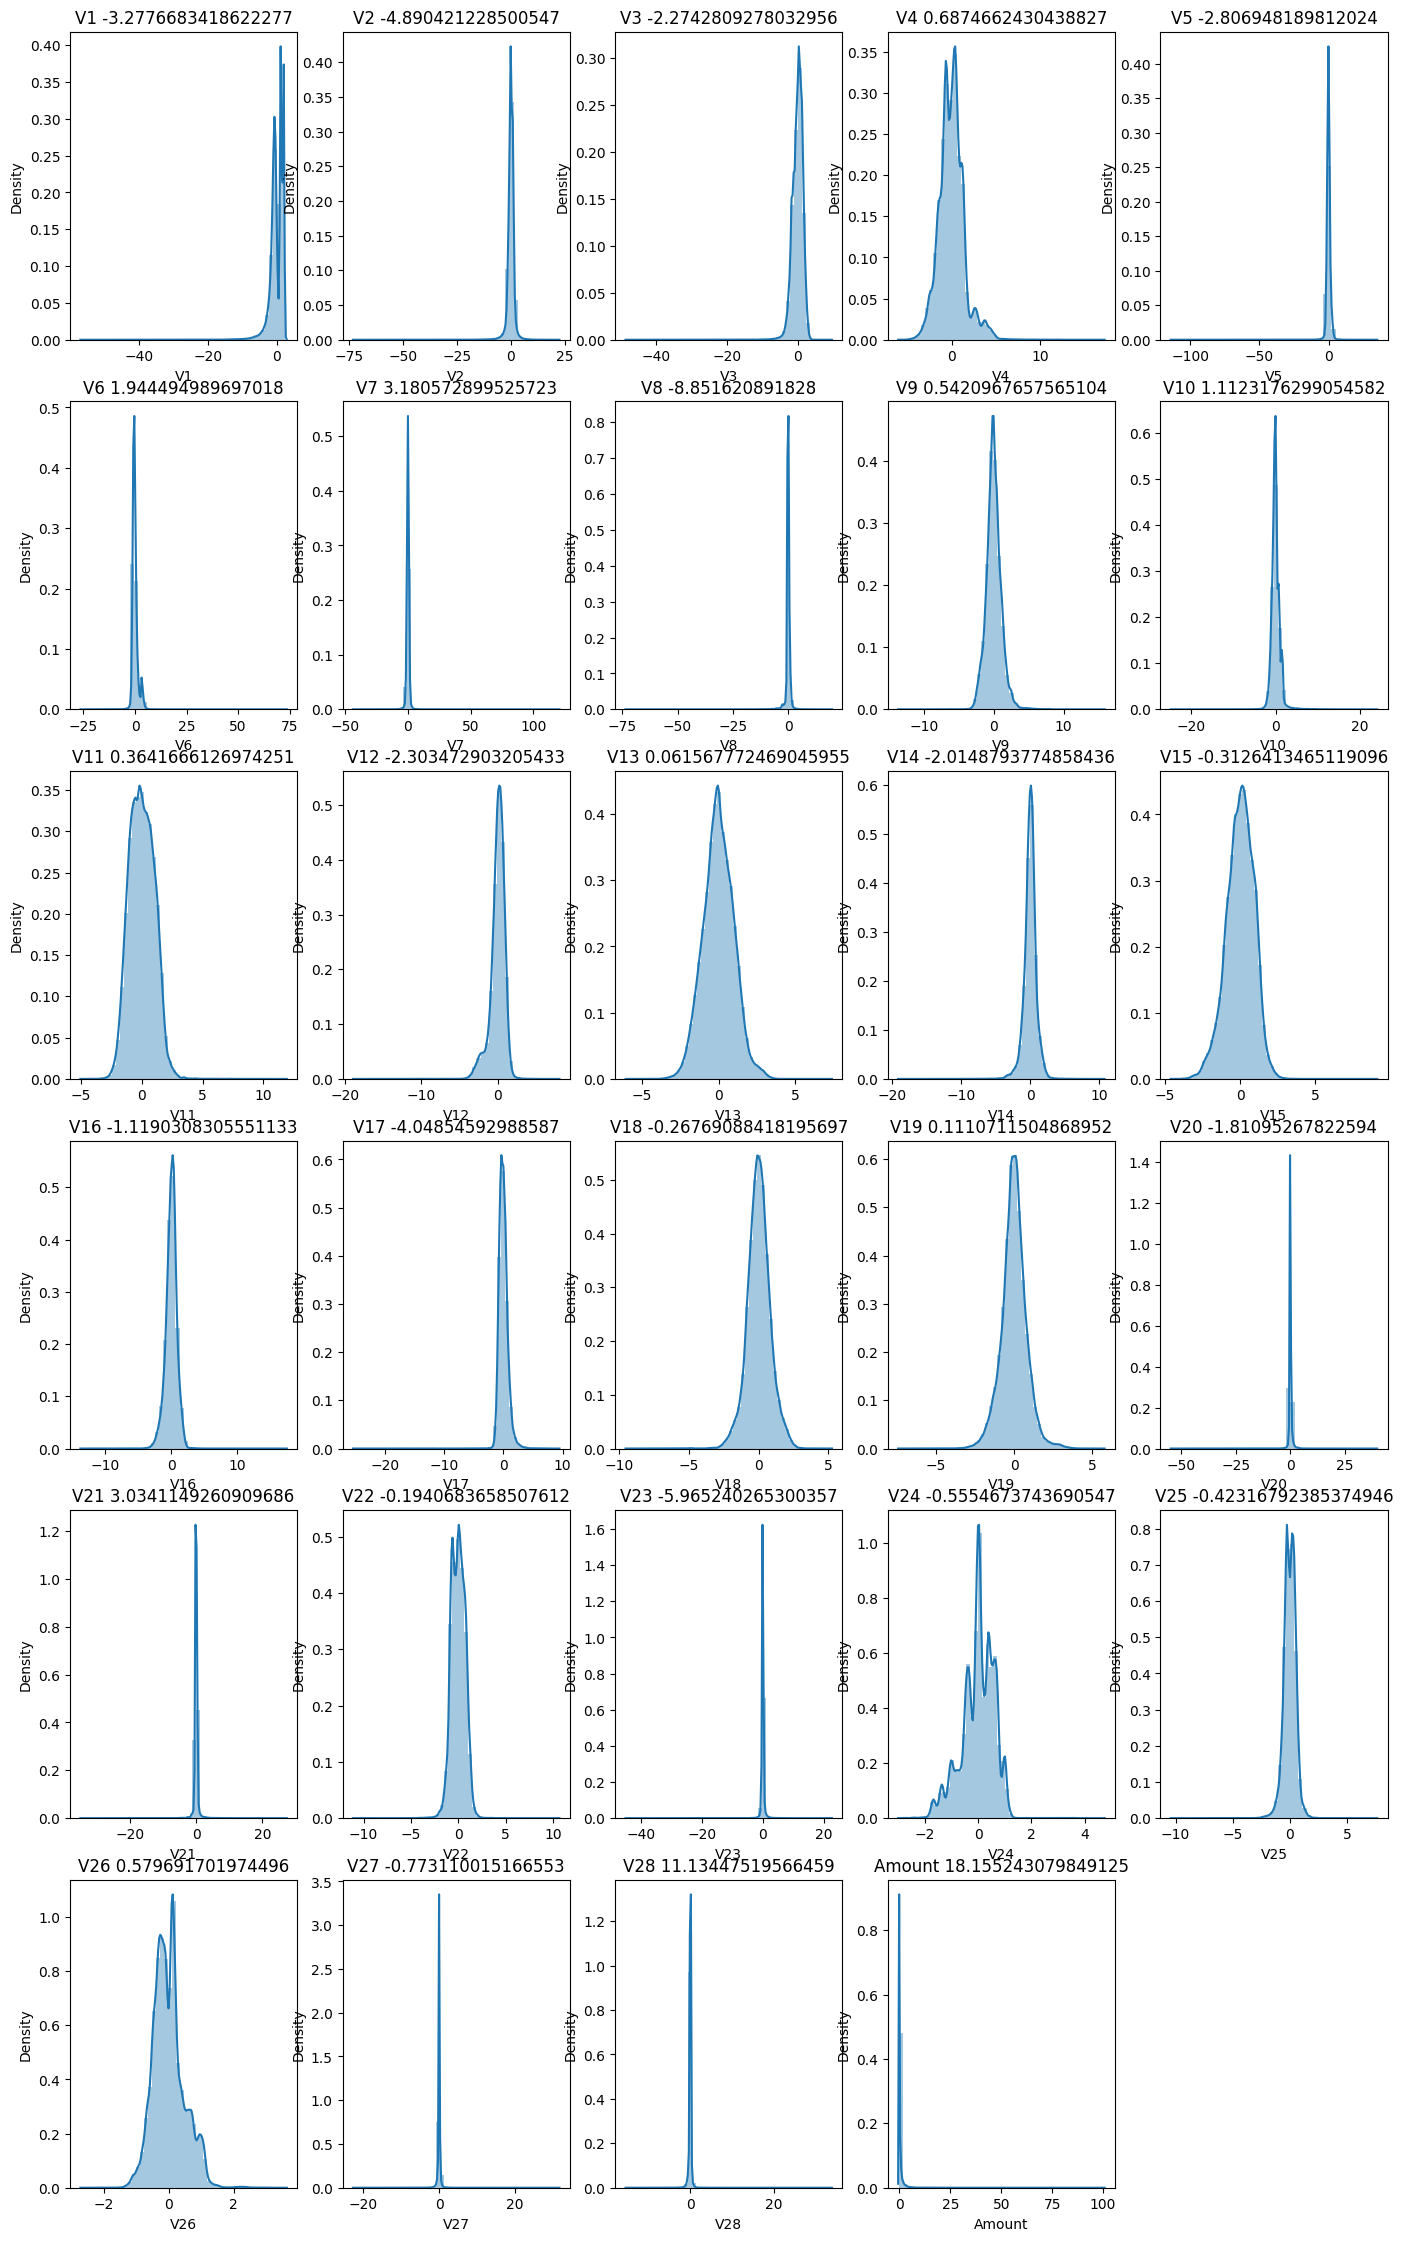

In [33]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skweness with PowerTransformer

In [34]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [35]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

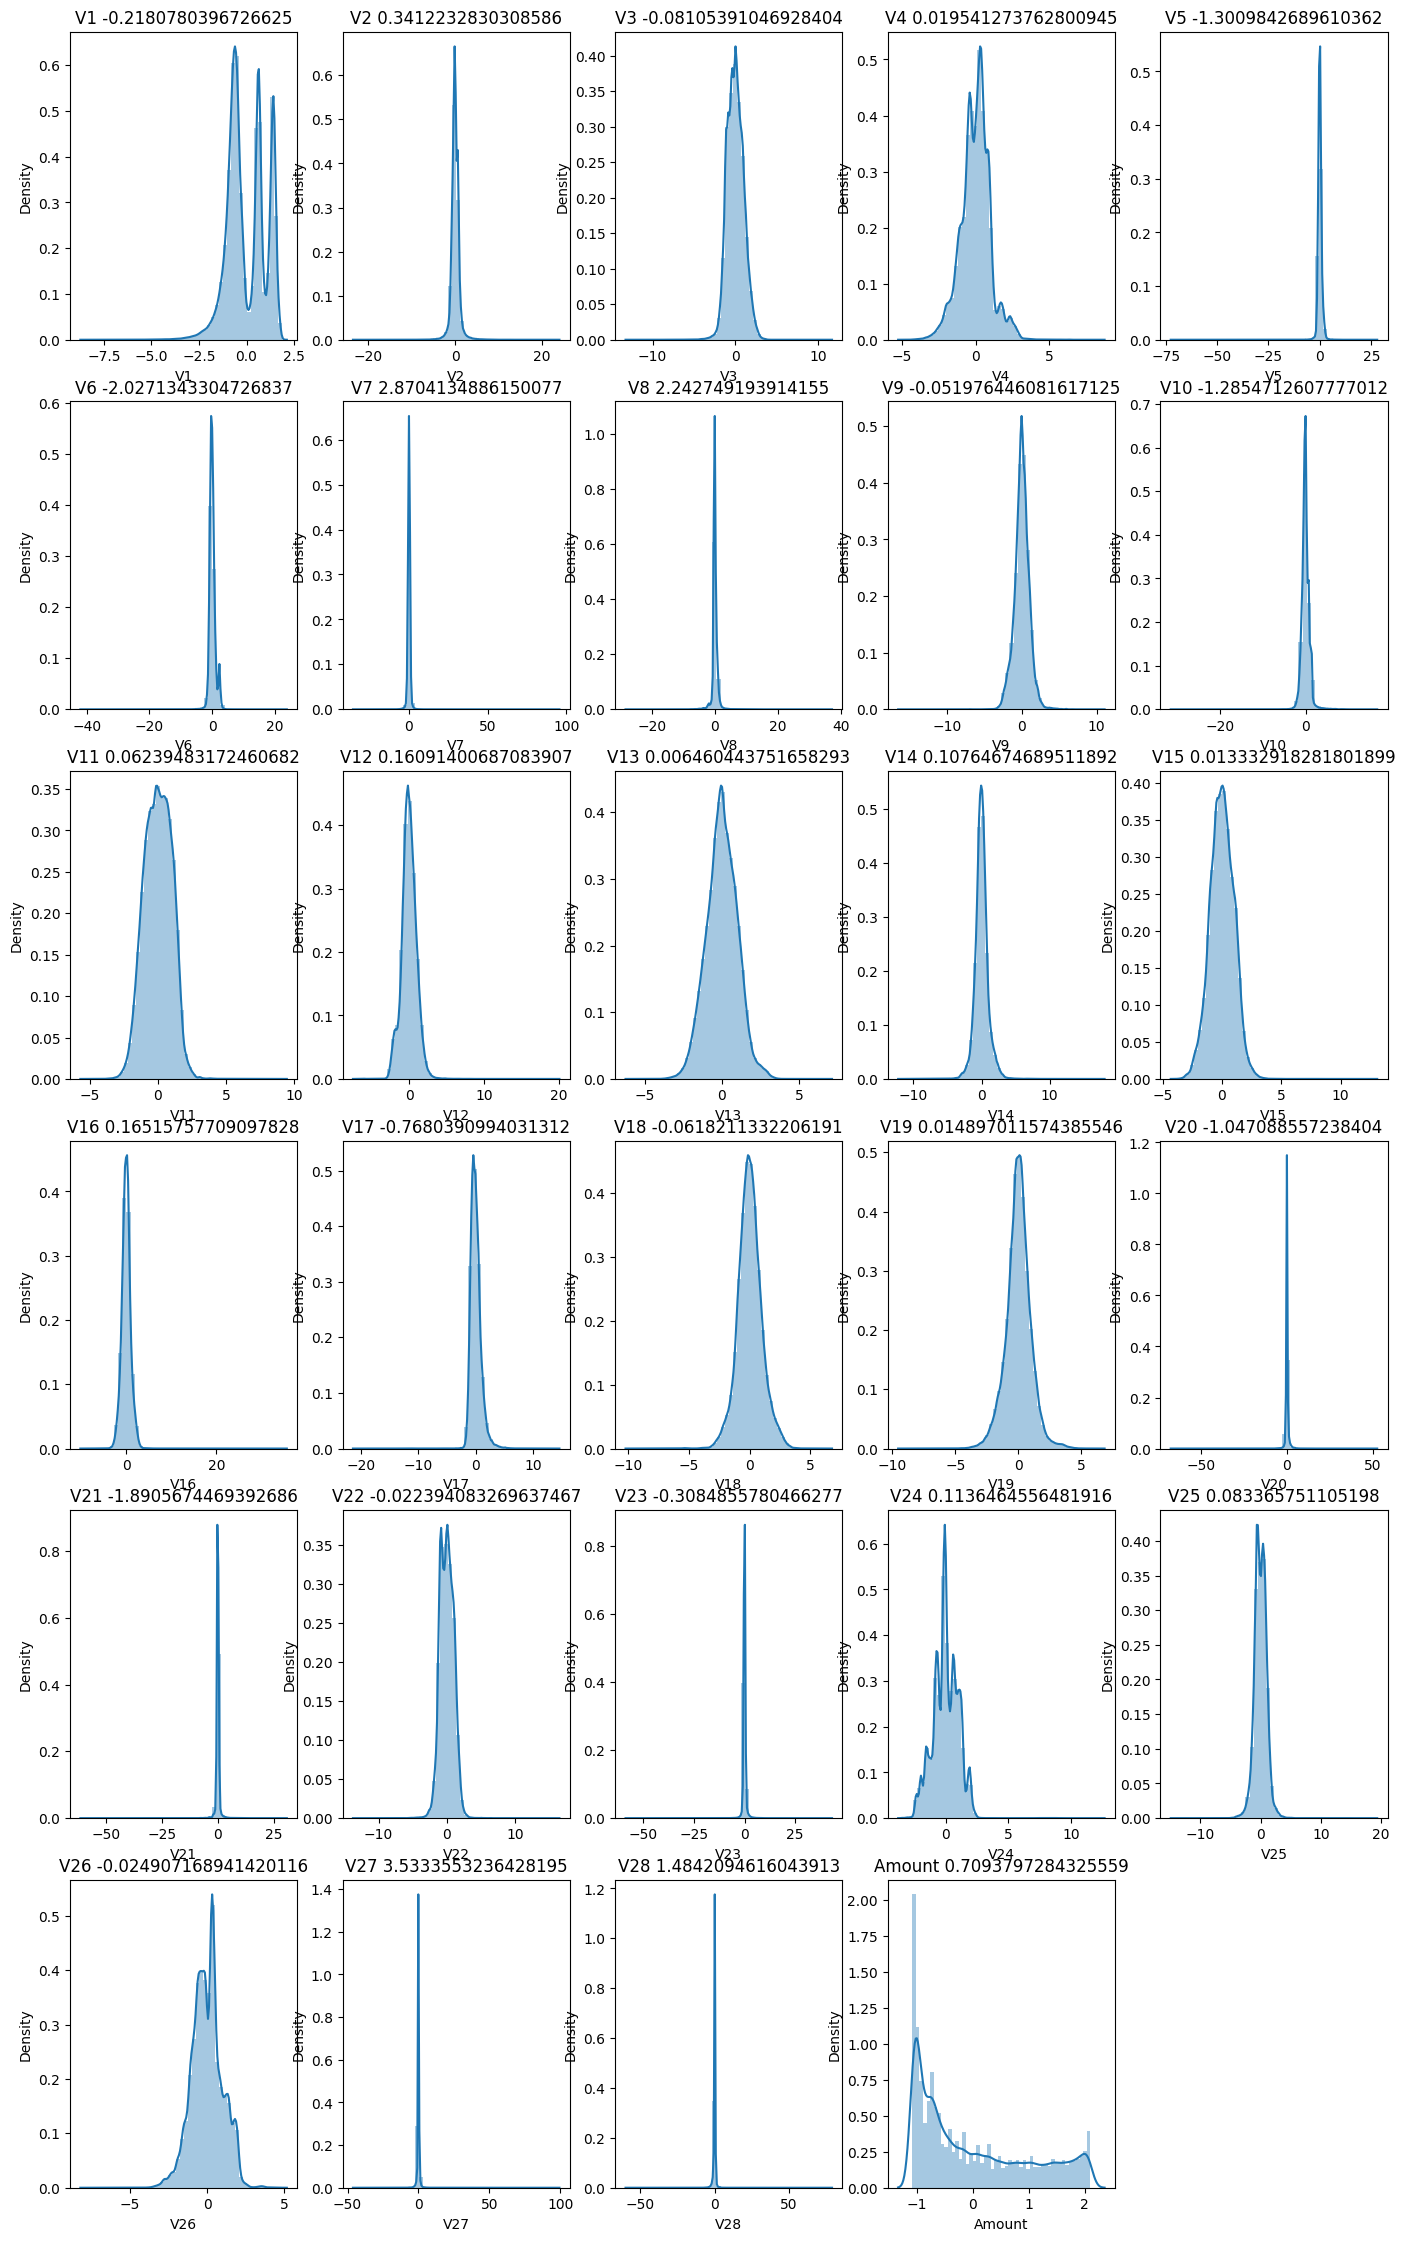

In [36]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

## Model building on imbalanced data

### Metric selection for heavily imbalanced data

As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

### Why SVM was not tried for model building and Random Forest was not tried for few cases?

In the dataset we have 284807 datapoints and in the case of Oversampling we would have even more number of datapoints. SVM is not very efficient with large number of datapoints beacuse it takes lot of computational power and resources to make the transformation. When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming. Hence, because of the unavailablity of the required resources and time SVM was not tried.

For the same reason Random forest was also not tried for model building in few of the hyperparameter tuning for oversampling technique.

### Why KNN was not used for model building?

KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points. It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

### Logistic regression

In [37]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [38]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#### Tuning hyperparameter C

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [39]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [40]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [41]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.298363      0.012208         0.004714        0.006263    0.01   
1       0.374110      0.030476         0.007331        0.007172     0.1   
2       0.380478      0.030704         0.014141        0.007718       1   
3       0.417564      0.025325         0.012611        0.006307      10   
4       0.402562      0.025918         0.012578        0.006291     100   
5       0.392699      0.041160         0.012621        0.006313    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.986856           0.987234           0.968390   
1   {'C': 0.1}           0.986104           0.987144           0.960929   
2     {'C': 1}           0.985834           0.986806           0.958452   
3    {'C': 10}           0.985798           0.986754           0.958181   
4   {'C': 100}           0.985793           0.986748           0.958155   
5  {'C': 1000}           0.985793           0.986747           0.958153   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.982373           0.993743         0.983719        0.008479   
1           0.980620           0.992284         0.981416        0.010893   
2           0.979781           0.991548         0.980484        0.011635   
3           0.979674           0.991467         0.980375        0.011715   
4           0.979666           0.991461         0.980365        0.011722   
5           0.979663           0.991461         0.980363        0.011723   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.984043            0.984587   
1                2            0.982402            0.983785   
2                3            0.981722            0.983322   
3                4            0.981632            0.983262   
4                5            0.981625            0.983256   
5                6            0.981623            0.983256   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988474            0.985596            0.983075   
1            0.987917            0.984018            0.981187   
2            0.987492            0.983305            0.980489   
3            0.987435            0.983216            0.980404   
4            0.987429            0.983207            0.980396   
5            0.987428            0.983206            0.980395   

   mean_train_score  std_train_score  
0          0.985155         0.001849  
1          0.983862         0.002270  
2          0.983266         0.002365  
3          0.983190         0.002375  
4          0.983182         0.002376  
5          0.983182         0.002376

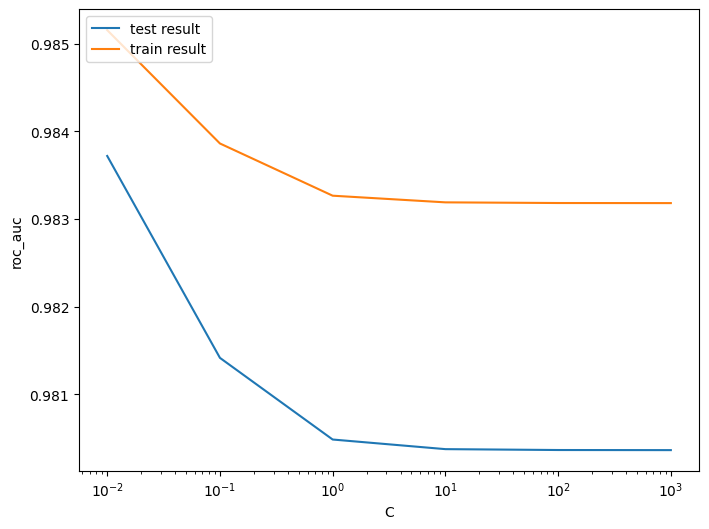

In [42]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [43]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9837192853831933 at C = 0.01


### Logistic regression with optimal C

In [44]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [45]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

Prediction on the train set

In [46]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [47]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227427     22]
 [   135    261]]


In [48]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [49]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993109350655051
Sensitivity:- 0.6590909090909091
Specificity:- 0.9999032750198946
F1-Score:- 0.7687776141384388


In [50]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



#### ROC on the train set

In [51]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [52]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

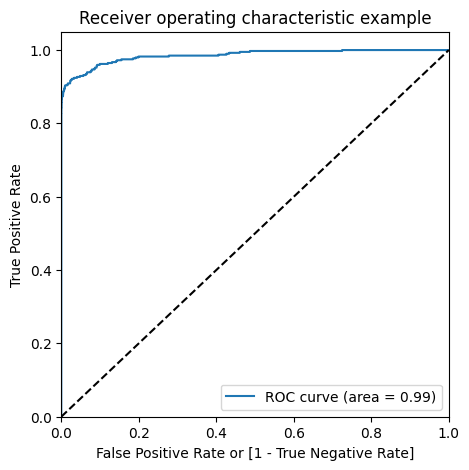

In [53]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

We acheived very good ROC 0.99 on the train set.

#### Prediction on the test set

In [54]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [55]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56850    16]
 [   42    54]]


In [56]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [57]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731
F1-Score:- 0.6506024096385543


In [58]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



#### ROC on the test set

In [59]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

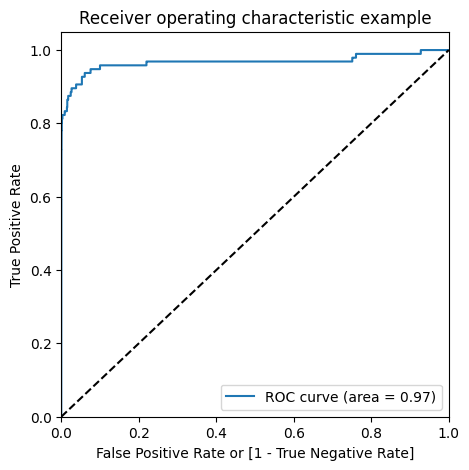

In [60]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see that we have very good ROC on the test set 0.97, which is almost close to 1.

***Model summary***

Train set:
- Accuracy = 0.99
- Sensitivity = 0.66
- Specificity = 0.99
- F1-Score = 0.76
- ROC = 0.99

Test set:
- Accuracy = 0.99
- Sensitivity = 0.56
- Specificity = 0.99
- F1-Score = 0.65
- ROC = 0.97

Overall, the model is performing well in the test set, what it had learnt from the train set.

### XGBoost

In [61]:
# Importing XGBoost
from xgboost import XGBClassifier

#### Tuning the hyperparameters

In [62]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [63]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.022863      0.674045         0.041715        0.007834   
1      12.580126      0.790026         0.065162        0.004066   
2      14.869390      0.268754         0.051304        0.005989   
3       8.134501      0.034998         0.056367        0.006501   
4      11.981184      0.132234         0.059609        0.004757   
5      14.490757      0.166042         0.052331        0.007296   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.979854   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.977143   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.978125   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.961152   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.970611   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.972799   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.971801           0.981423         0.977693        0.004215   
1           0.972788           0.977688         0.975873        0.002193   
2           0.970882           0.980136         0.976381        0.003974   
3           0.974480           0.963067         0.966233        0.005884   
4           0.965527           0.983906         0.973348        0.007748   
5           0.973557           0.974113         0.973490        0.000539   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999894            0.999940   
1                3            0.999966            0.999987   
2                2            0.999950            0.999983   
3                6            0.999999            1.000000   
4                5            1.000000            1.000000   
5                4            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.999847          0.999894     3.788698e-05  
1            0.999966          0.999973     9.597800e-06  
2            0.999911          0.999948     2.936301e-05  
3            0.999999          0.999999     3.316165e-07  
4            1.000000          1.000000     0.000000e+00  
5            1.000000          1.000000     0.000000e+00

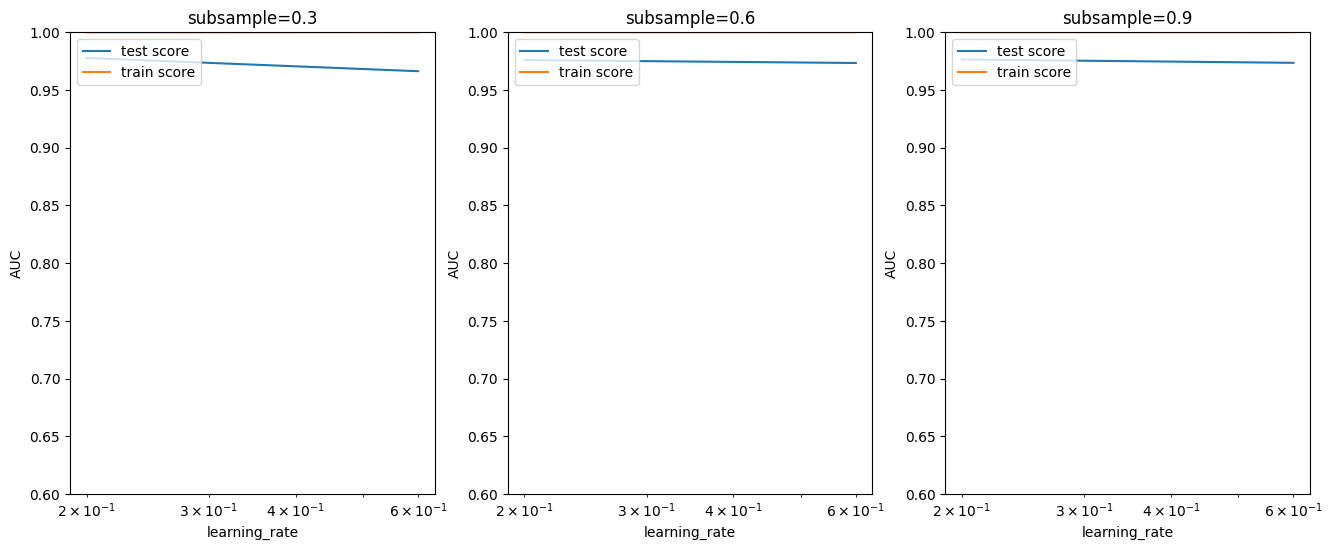

In [64]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [65]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

Model with optimal hyperparameters:
- We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [66]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[16:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

#### Prediction on the train set

In [67]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [68]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227449      0]
 [     0    396]]


In [69]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [70]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [71]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [72]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [73]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

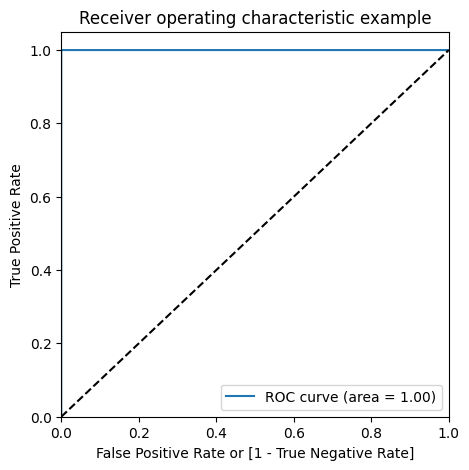

In [74]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Prediction on the test set

In [75]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [76]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56859     7]
 [   24    72]]


In [77]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [78]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9994557775359011
Sensitivity:- 0.75
Specificity:- 0.999876903597932
F1-Score:- 0.8228571428571428


In [79]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [80]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [81]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9785370798602564

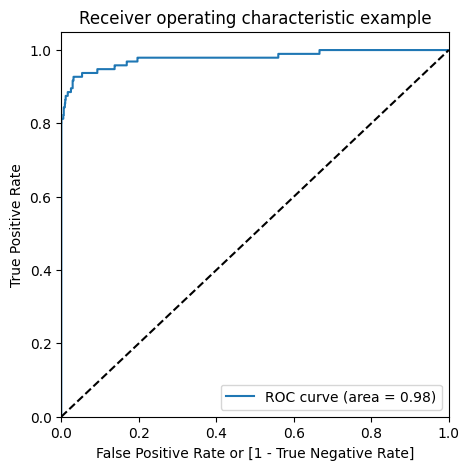

In [82]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:
- Accuracy = 1.0
- Sensitivity = 1.0
- Specificity = 0.99
- ROC-AUC = 1.0
- F1-Score = 1.0

Test set:
- Accuracy = 0.99
- Sensitivity = 0.75
- Specificity = 0.99
- ROC-AUC = 0.98
- F-Score = 0.82

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [83]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [84]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [85]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.348724      0.037408         0.015626        0.000001   
1       2.345118      0.041484         0.015979        0.000487   
2       2.309622      0.003022         0.015652        0.000039   
3       2.333715      0.017647         0.012116        0.008816   
4       4.570673      0.007799         0.015976        0.000502   
5       4.584603      0.019289         0.017110        0.002982   
6       4.594729      0.052776         0.015646        0.000043   
7       4.606670      0.065855         0.015625        0.000002   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.933297   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.933297   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.917551   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.924921   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.933461   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.933446   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.933183           0.923876         0.930132        0.004424   
1           0.933183           0.923873         0.930131        0.004425   
2           0.936720           0.944598         0.938205        0.004732   
3           0.936720           0.944598         0.938205        0.004732   
4           0.923907           0.937992         0.926483        0.008542   
5           0.916453           0.937979         0.926451        0.008854   
6           0.919672           0.921753         0.924962        0.006069   
7           0.919668           0.921733         0.924949        0.006067   

   rank_test_score  
0                3  
1                4  
2                1  
3                1  
4                5  
5                6  
6                7  
7                8

In [86]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382050164508641
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [87]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

#### Prediction on the train set

In [88]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [89]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7490039840637449


In [92]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [93]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [94]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9534547393930157

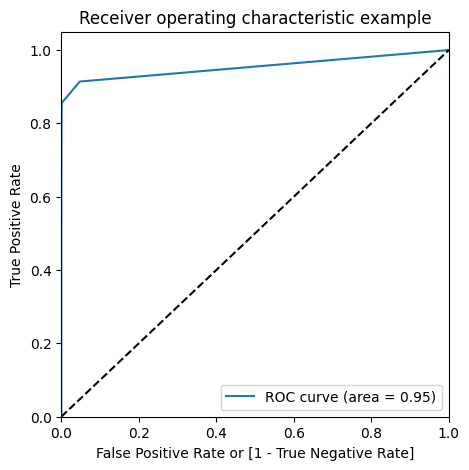

In [95]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Prediction on the test set

In [96]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [97]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56836    30]
 [   40    56]]


In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.7490039840637449


In [100]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [101]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [102]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.92174979703748

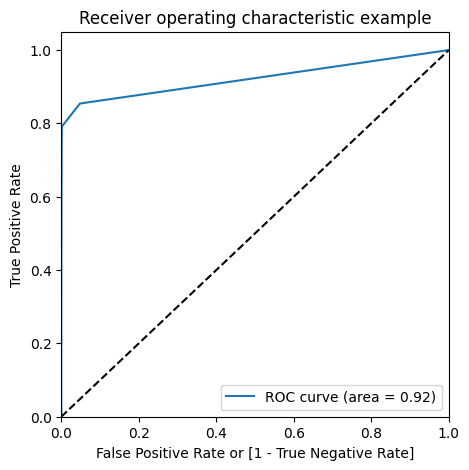

In [103]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:
- Accuracy = 0.99
- Sensitivity = 1.0
- Specificity = 1.0
- F1-Score = 0.75
- ROC-AUC = 0.95

Test set:
- Accuracy = 0.99
- Sensitivity = 0.58
- Specificity = 0.99
- F-1 Score = 0.75
- ROC-AUC = 0.92

### Random forest

In [104]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [105]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [106]:
# printing the optimal accuracy score and hyperparameters 
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9992846011618356 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}


In [107]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [108]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

#### Prediction on the train set

In [109]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [110]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993723803462881
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.8043775649794801


In [113]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.88      0.74      0.80       396

    accuracy                           1.00    227845
   macro avg       0.94      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



In [114]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [115]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9830051589764757

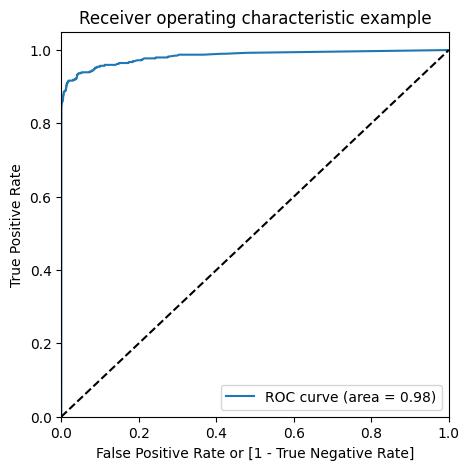

In [116]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Prediction on the test set

In [117]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [118]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56843    23]
 [   33    63]]


In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9990168884519505
Sensitivity:- 0.65625
Specificity:- 0.9995955403932051
F1-Score:- 0.8043775649794801


In [121]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.66      0.69        96

    accuracy                           1.00     56962
   macro avg       0.87      0.83      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [122]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [123]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9636904997420834

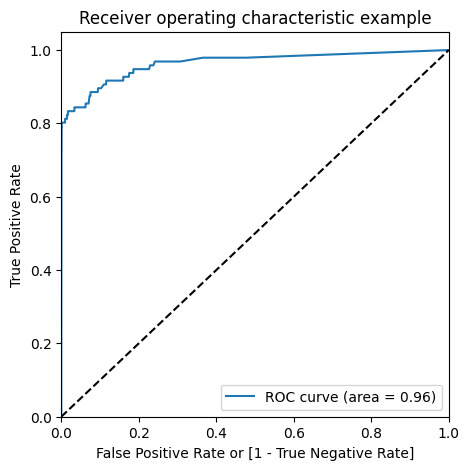

In [124]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:
    
- Accuracy = 0.99
- Sensitivity = 1.0
- Specificity = 1.0
- F1-Score = 0.80
- ROC-AUC = 0.98

Test set:
    
- Accuracy = 0.99
- Sensitivity = 0.61
- Specificity = 0.99
- F-1 Score = 0.80
- ROC-AUC = 0.96

### Choosing best model on the imbalanced data

We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well. More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best as XGBoost, which gives us ROC score of 1.0 on the train data and 0.98 on the test data.

Keep in mind that XGBoost requires more resource utilization than Logistic model. Hence building XGBoost model is more costlier than the Logistic model. But XGBoost having ROC score 0.98, which is 0.01 more than the Logistic model. The 0.01 increase of score may convert into huge amount of saving for the bank.

### Print the important features of the best model to understand the dataset

- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


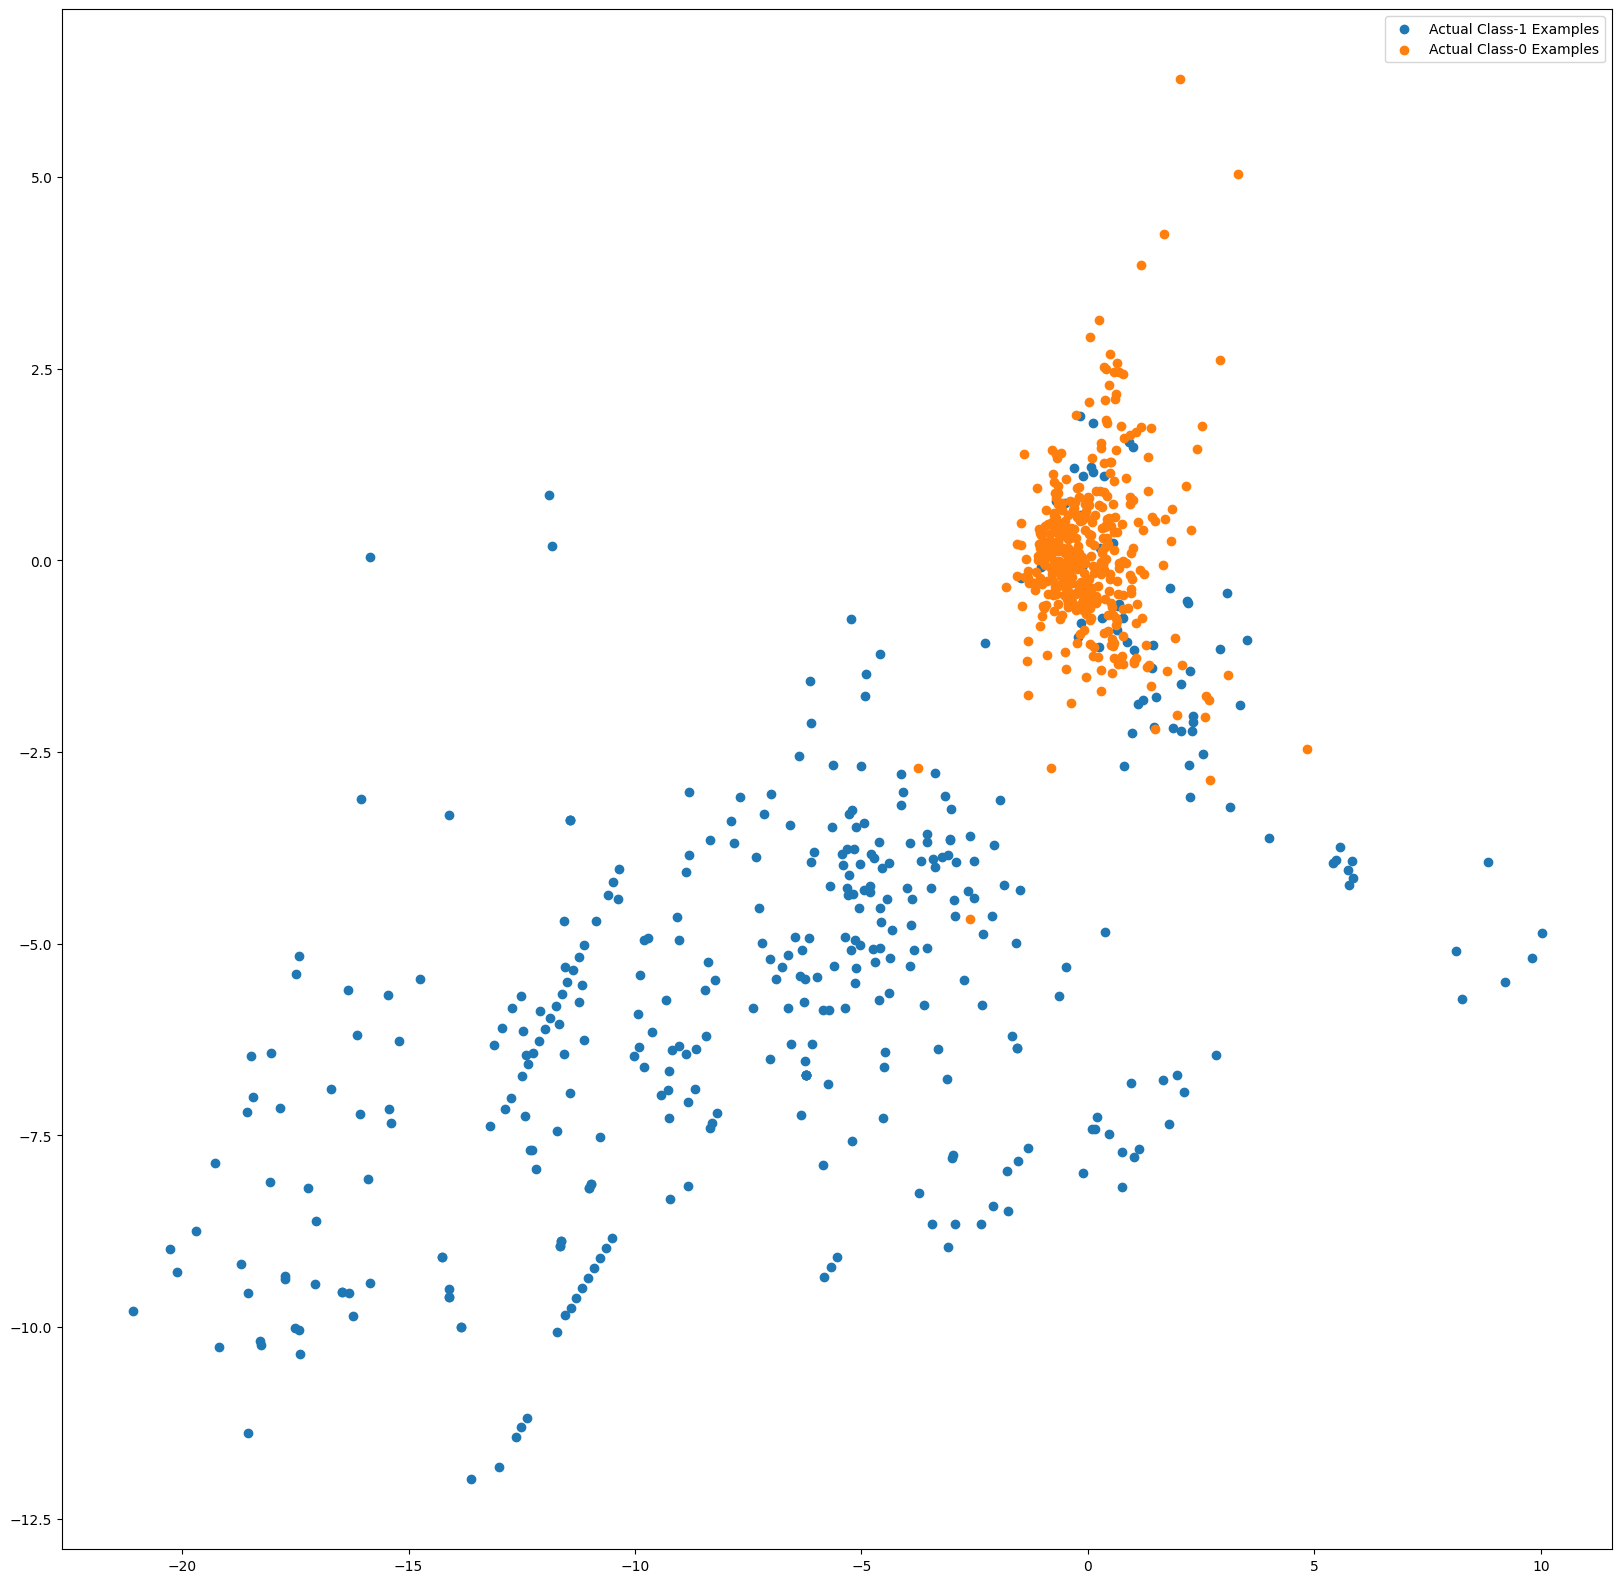

In [125]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [126]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.84747875


We can see that the threshold is 0.85, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Handling data imbalance

As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

- Undersampling :- Here for balancing the class distribution, the non-fraudulent transctions count will be reduced to 396 (similar count of fraudulent transctions)
- Oversampling :- Here we will make the same count of non-fraudulent transctions as fraudulent transctions.
- SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data.
- Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

### Undersampling

In [127]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [128]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [129]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


## Model building on balanced data with Undersampling

### Logistic Regression

In [130]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [131]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.005446      0.001020         0.001982        0.000630     0.1   
1       0.005991      0.001553         0.001018        0.000657       1   
2       0.003928      0.003774         0.003126        0.006251      10   
3       0.012499      0.006249         0.000726        0.001452     100   
4       0.008683      0.001979         0.001933        0.000172    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 0.1}           0.987281           0.992403           0.964744   
1     {'C': 1}           0.985851           0.991136           0.962821   
2    {'C': 10}           0.981399           0.989237           0.965865   
3   {'C': 100}           0.980127           0.989395           0.965545   
4  {'C': 1000}           0.979650           0.989237           0.965064   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.976431           0.982272         0.980626        0.009545   
1           0.972102           0.982595         0.978901        0.010163   
2           0.970499           0.984045         0.978209        0.008691   
3           0.970018           0.983884         0.977794        0.008805   
4           0.969857           0.983884         0.977539        0.008902   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.990044            0.988679   
1                2            0.991033            0.990466   
2                3            0.991622            0.991025   
3                4            0.991582            0.991125   
4                5            0.991582            0.991165   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.992178            0.990765            0.990662   
1            0.993303            0.991959            0.991678   
2            0.994278            0.992068            0.992295   
3            0.994268            0.992059            0.992404   
4            0.994248            0.992059            0.992394   

   mean_train_score  std_train_score  
0          0.990466         0.001134  
1          0.991688         0.000959  
2          0.992258         0.001099  
3          0.992288         0.001080  
4          0.992290         0.001064

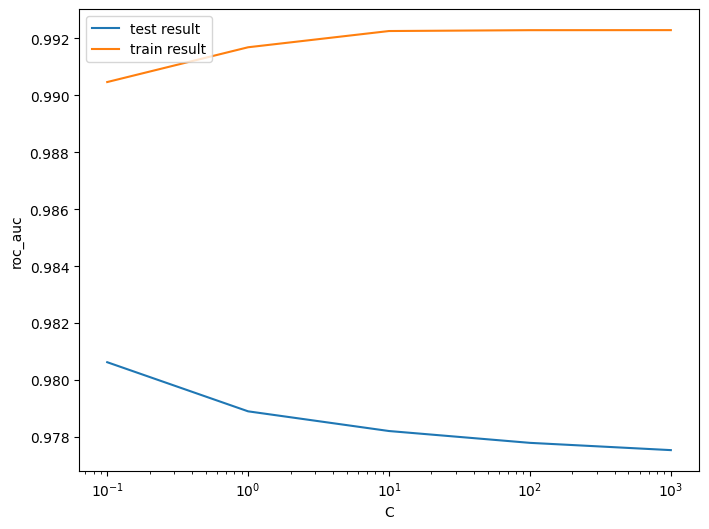

In [132]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [133]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9806261970578382 at C = 0.1


#### Logistic regression with optimal C

In [134]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [135]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

In [136]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [137]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[392   4]
 [ 32 364]]


In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9545454545454546
Sensitivity:- 0.9191919191919192
Specificity:- 0.98989898989899
F1-Score:- 0.9528795811518325


In [140]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       396
           1       0.99      0.92      0.95       396

    accuracy                           0.95       792
   macro avg       0.96      0.95      0.95       792
weighted avg       0.96      0.95      0.95       792



In [141]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [142]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9899946434037343

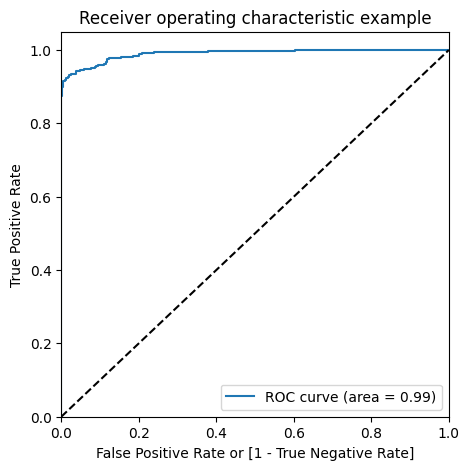

In [143]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [144]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [145]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55493  1373]
 [   11    85]]


In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9757031003124891
Sensitivity:- 0.8854166666666666
Specificity:- 0.9758555199943727


In [148]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [149]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [150]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9667148794241432

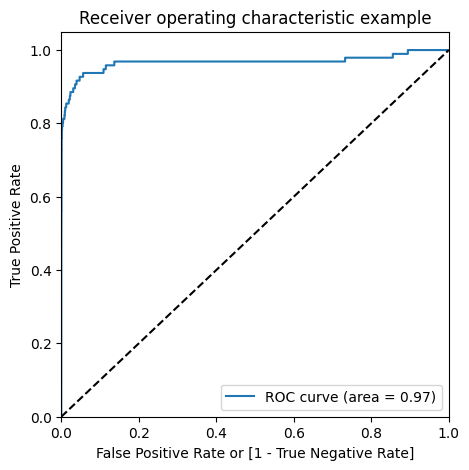

In [151]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:
    
- Accuracy = 0.95
- Sensitivity = 0.92
- Specificity = 0.98
- ROC = 0.99

Test set:
- Accuracy = 0.97
- Sensitivity = 0.86
- Specificity = 0.97
- ROC = 0.96

### XGBoost

In [152]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [153]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.069630      0.010401         0.007876        0.005481   
1       0.066562      0.001214         0.000000        0.000000   
2       0.090943      0.009088         0.000000        0.000000   
3       0.096925      0.003142         0.000000        0.000000   
4       0.098733      0.008909         0.009848        0.006998   
5       0.107479      0.003318         0.000000        0.000000   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.972337   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.971935   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.973255   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.958792   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.971993   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.973887   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.975379           0.978421         0.975379        0.002484   
1           0.977330           0.979224         0.976163        0.003088   
2           0.978421           0.979741         0.977139        0.002798   
3           0.966426           0.979224         0.968147        0.008430   
4           0.978076           0.975034         0.975034        0.002484   
5           0.980257           0.975379         0.976507        0.002720   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999986            0.999957   
1                3            1.000000            1.000000   
2                1            1.000000            1.000000   
3                6            1.000000            1.000000   
4                5            1.000000            1.000000   
5                2            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0                 1.0          0.999981         0.000018  
1                 1.0          1.000000         0.000000  
2                 1.0          1.000000         0.000000  
3                 1.0          1.000000         0.000000  
4                 1.0          1.000000         0.000000  
5                 1.0          1.000000         0.000000

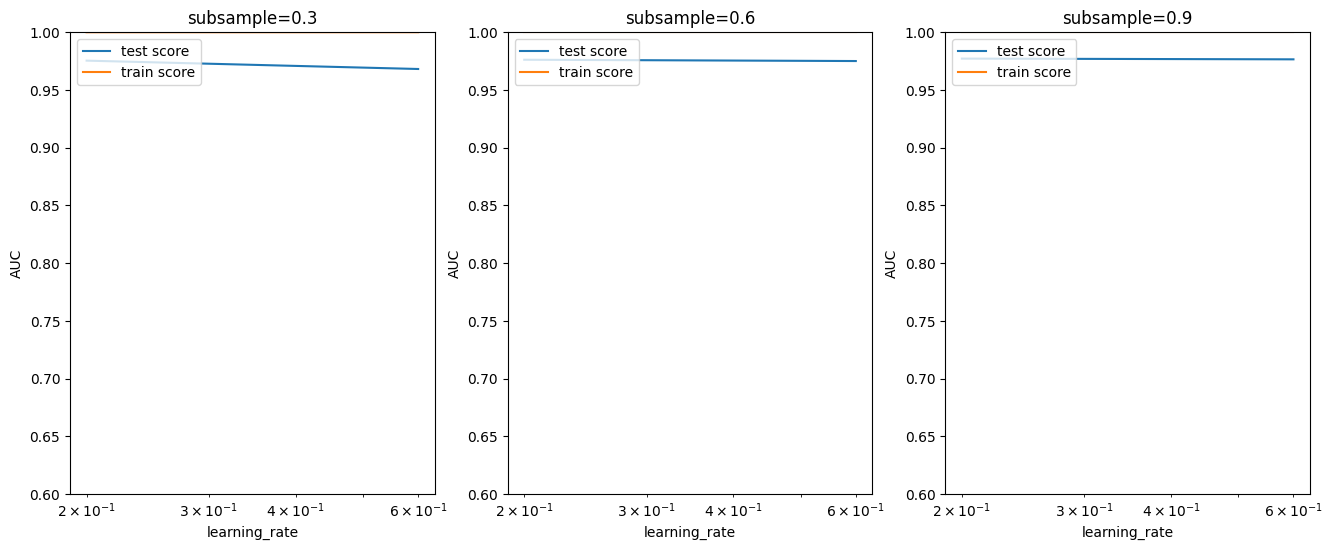

In [154]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [155]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [156]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

[17:41:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

#### Prediction on the train set

In [157]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [158]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[396   0]
 [  0 396]]


In [159]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [160]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [161]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       396

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792



In [162]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [163]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

1.0

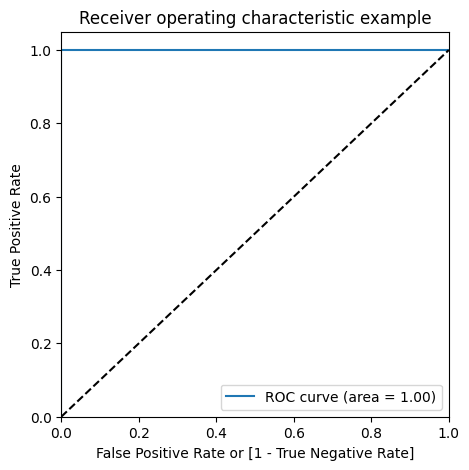

In [164]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [165]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [166]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54330  2536]
 [   10    86]]


In [167]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [168]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9553035356904603
Sensitivity:- 0.8958333333333334
Specificity:- 0.9554039320507861


In [169]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.03      0.90      0.06        96

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [170]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [171]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9783510614133811

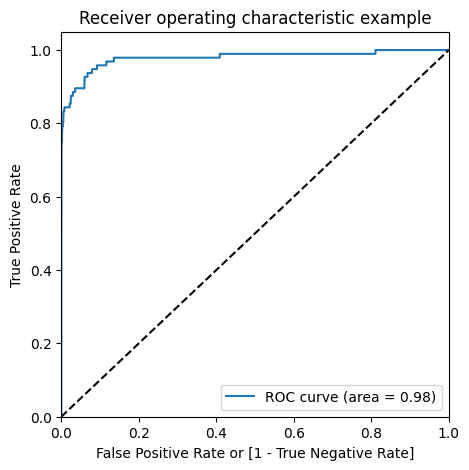

In [172]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:
    
- Accuracy = 1.0
- Sensitivity = 1.0
- Specificity = 1.0
- ROC-AUC = 1.0

Test set:

- Accuracy = 0.96
- Sensitivity = 0.91
- Specificity = 0.95
- ROC-AUC = 0.97

### Decision Tree

In [173]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [174]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004887      0.000991         0.001336        0.000945   
1       0.001669      0.002360         0.007655        0.004790   
2       0.004031      0.000035         0.001994        0.000007   
3       0.003728      0.000385         0.001335        0.000944   
4       0.000000      0.000000         0.005232        0.007399   
5       0.005207      0.007363         0.000000        0.000000   
6       0.006229      0.006768         0.000000        0.000000   
7       0.004361      0.006168         0.000000        0.000000   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.945104   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.951217   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.948864   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.942837   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.951733   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.951561   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.949294   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.948864   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.972136           0.962064         0.959768        0.011154   
1           0.966454           0.960514         0.959395        0.006271   
2           0.936639           0.953512         0.946338        0.007116   
3           0.936639           0.949782         0.943086        0.005368   
4           0.961834           0.962064         0.958544        0.004817   
5           0.965880           0.958333         0.958592        0.005849   
6           0.936639           0.953512         0.946482        0.007170   
7           0.936639           0.949782         0.945095        0.005991   

   rank_test_score  
0                1  
1                2  
2                6  
3                8  
4                4  
5                3  
6                5  
7                7

In [175]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9597681359044996
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [176]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### Prediction on the train set

In [177]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [178]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[389   7]
 [ 52 344]]


In [179]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [180]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9255050505050505
Sensitivity:- 0.8686868686868687
Specificity:- 0.9823232323232324


In [181]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       396
           1       0.98      0.87      0.92       396

    accuracy                           0.93       792
   macro avg       0.93      0.93      0.93       792
weighted avg       0.93      0.93      0.93       792



In [182]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [183]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9785481073359862

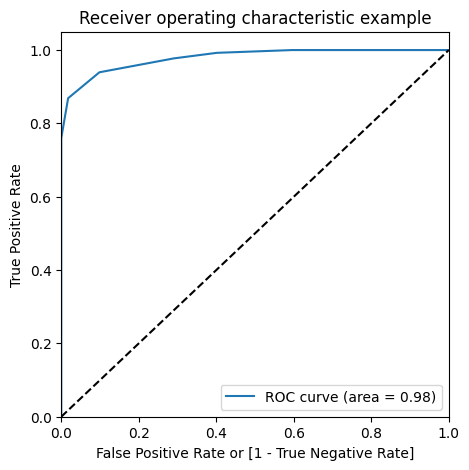

In [184]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [185]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

In [186]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55713  1153]
 [   19    77]]


In [187]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [188]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.979424879744391
Sensitivity:- 0.8020833333333334
Specificity:- 0.9797242640593676


In [189]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.80      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [190]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [191]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.966386530762377

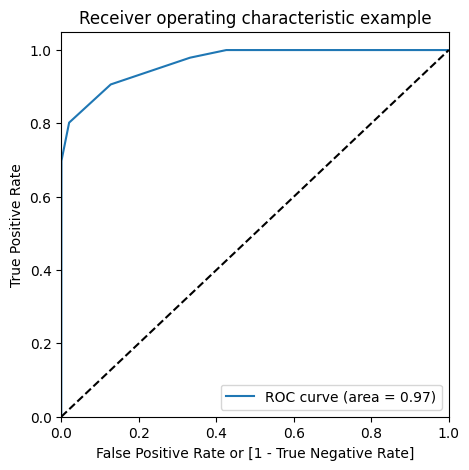

In [192]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:
    
- Accuracy = 0.93
- Sensitivity = 0.94
- Specificity = 0.93
- ROC-AUC = 0.98

Test set:

- Accuracy = 0.87
- Sensitivity = 0.90
- Specificity = 0.87
- ROC-AUC = 0.96

### Random forest

In [193]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [194]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.9764819916335068 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [195]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [196]:
# Fit the model
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

In [197]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [198]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[392   4]
 [ 43 353]]


In [199]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [200]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9406565656565656
Sensitivity:- 0.8914141414141414
Specificity:- 0.98989898989899
F1-Score:- 0.9375830013280213


In [201]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       396
           1       0.99      0.89      0.94       396

    accuracy                           0.94       792
   macro avg       0.94      0.94      0.94       792
weighted avg       0.94      0.94      0.94       792



In [202]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [203]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9864745944291398

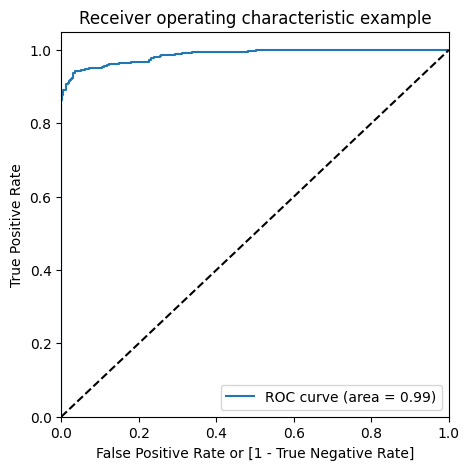

In [204]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [205]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(X_test)

In [206]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56198   668]
 [   17    79]]


In [207]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [208]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9879744390997507
Sensitivity:- 0.8229166666666666
Specificity:- 0.9882530862026518


In [209]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.82      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [210]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

In [211]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9725181787008055

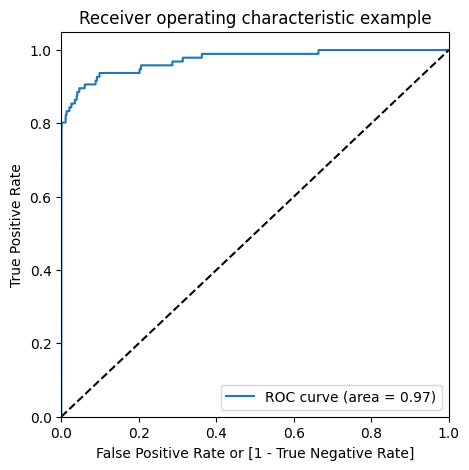

In [212]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:

- Accuracy = 0.93
- Sensitivity = 0.90
- Specificity = 0.87
- ROC-AUC = 0.99

Test set:

- Accuracy = 0.98
- Sensitivity = 0.83
- Specificity = 0.98
- ROC-AUC = 0.97

### Oversampling

In [213]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [214]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [215]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


### Logistic Regression

In [216]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [217]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.798104      0.015792         0.025531        0.008084    0.01   
1       0.782847      0.037037         0.021627        0.006314     0.1   
2       0.800798      0.032746         0.030196        0.003135       1   
3       0.773919      0.021216         0.025000        0.007654      10   
4       0.777337      0.022316         0.028564        0.006502     100   
5       0.778202      0.006192         0.020328        0.006158    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.988850           0.988501           0.988262   
1   {'C': 0.1}           0.988863           0.988519           0.988276   
2     {'C': 1}           0.988863           0.988525           0.988278   
3    {'C': 10}           0.988863           0.988526           0.988278   
4   {'C': 100}           0.988863           0.988526           0.988277   
5  {'C': 1000}           0.988863           0.988526           0.988277   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.988462           0.989012         0.988617        0.000273   
1           0.988458           0.989027         0.988629        0.000275   
2           0.988455           0.989028         0.988630        0.000275   
3           0.988455           0.989028         0.988630        0.000275   
4           0.988455           0.989028         0.988630        0.000275   
5           0.988455           0.989028         0.988630        0.000275   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.988624            0.988624   
1                5            0.988637            0.988635   
2                4            0.988639            0.988636   
3                1            0.988639            0.988636   
4                2            0.988639            0.988636   
5                3            0.988639            0.988636   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988671            0.988713            0.988591   
1            0.988681            0.988723            0.988604   
2            0.988680            0.988723            0.988606   
3            0.988680            0.988723            0.988606   
4            0.988680            0.988723            0.988606   
5            0.988679            0.988723            0.988606   

   mean_train_score  std_train_score  
0          0.988645         0.000043  
1          0.988656         0.000041  
2          0.988657         0.000041  
3          0.988657         0.000041  
4          0.988657         0.000040  
5          0.988657         0.000040

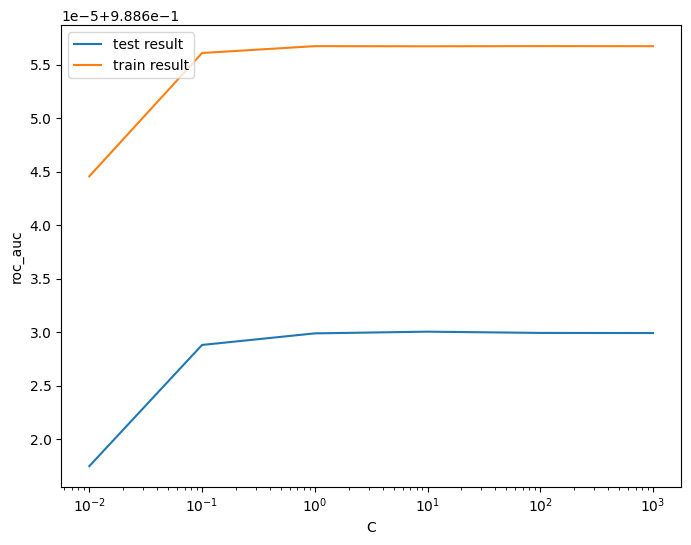

In [218]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [219]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9886300447296152 at C = 10


#### Logistic regression with optimal C

In [220]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

In [221]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

#### Prediction on the train set

In [222]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [223]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[222267   5182]
 [ 17113 210336]]


In [224]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [225]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.950989012921578
Sensitivity:- 0.9247611552479896
Specificity:- 0.9772168705951664
F1-Score:- 0.9496689369637016


In [226]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [227]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [228]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9886532163728807

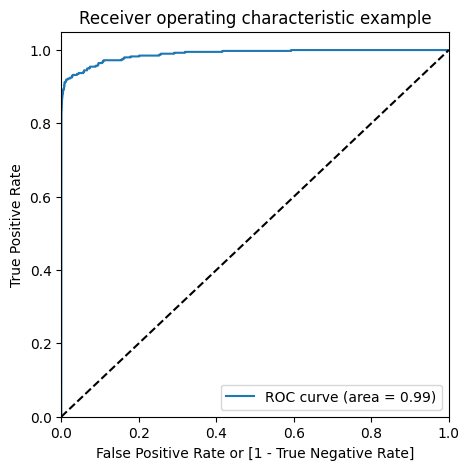

In [229]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on the test set

In [230]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

In [231]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55537  1329]
 [   11    85]]


In [232]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [233]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9764755451002423
Sensitivity:- 0.8854166666666666
Specificity:- 0.9766292688073717


In [234]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [235]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [236]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9712787884383169

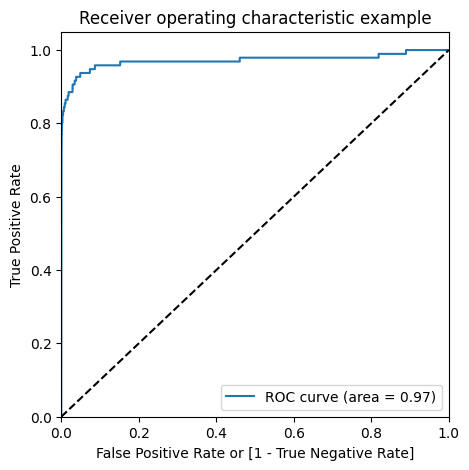

In [237]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:
    
- Accuracy = 0.95
- Sensitivity = 0.92
- Specificity = 0.97
- ROC = 0.99

Test set:

- Accuracy = 0.97
- Sensitivity = 0.89
- Specificity = 0.97
- ROC = 0.97

### XGBoost

In [238]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [239]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      16.981914      0.072298         0.122656        0.012522   
1      22.608358      0.057129         0.121696        0.008636   
2      24.824527      0.149902         0.126156        0.012225   
3      17.652036      0.631273         0.128862        0.016742   
4      22.654698      0.249875         0.123341        0.001861   
5      24.703025      0.090392         0.111244        0.006609   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999917   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999896   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999890   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999990   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999988   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999998   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999924           0.999913         0.999918        0.000004   
1           0.999922           0.999910         0.999910        0.000011   
2           0.999927           0.999913         0.999910        0.000015   
3           0.999987           0.999978         0.999985        0.000005   
4           0.999988           0.999980         0.999985        0.000004   
5           0.999989           0.999973         0.999987        0.000010   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999933            0.999926   
1                6            0.999921            0.999931   
2                5            0.999911            0.999920   
3                3            0.999999            0.999998   
4                2            1.000000            1.000000   
5                1            0.999999            0.999998   

   split2_train_score  mean_train_score  std_train_score  
0            0.999933          0.999931     3.104187e-06  
1            0.999928          0.999927     4.188478e-06  
2            0.999935          0.999922     1.002976e-05  
3            0.999998          0.999998     6.493496e-07  
4            0.999998          0.999999     7.768795e-07  
5            0.999999          0.999999     5.094445e-07

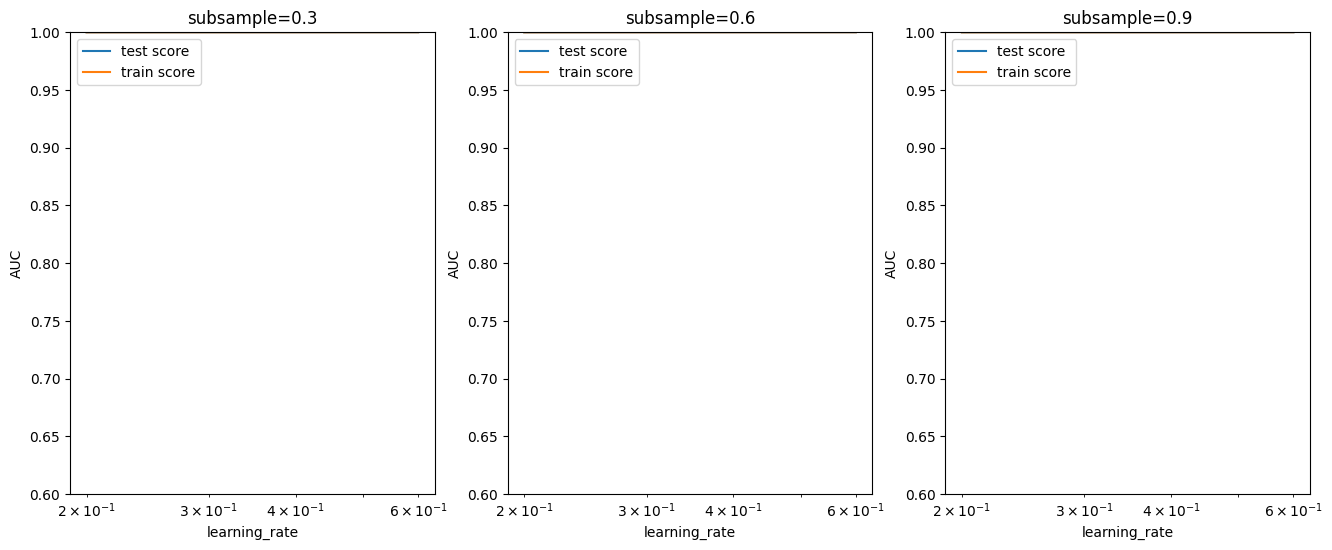

In [240]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [241]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [242]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

[17:49:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

In [243]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [244]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[227449      0]
 [     0 227449]]


In [245]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [246]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [247]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [248]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [249]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

1.0

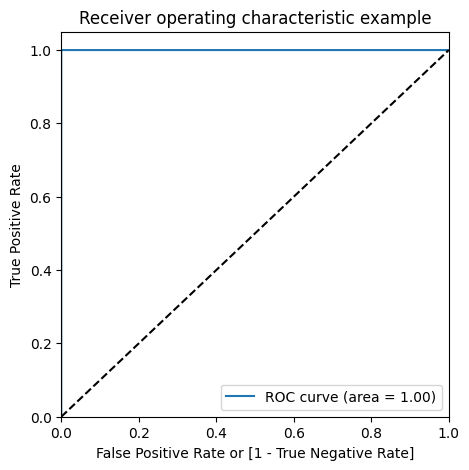

In [250]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on the test set

In [251]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

In [252]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56855    11]
 [   20    76]]


In [253]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [254]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9994557775359011
Sensitivity:- 0.7916666666666666
Specificity:- 0.9998065627967503


In [255]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.87      0.79      0.83        96

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [256]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [257]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9730397813866516

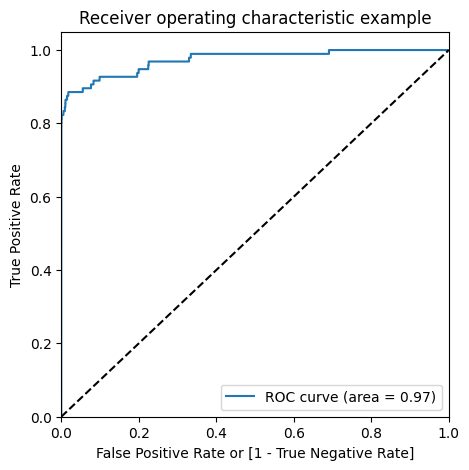

In [258]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:
    
- Accuracy = 1.0
- Sensitivity = 1.0
- Specificity = 1.0
- ROC-AUC = 1.0

Test set:

- Accuracy = 0.99
- Sensitivity = 0.78
- Specificity = 0.99
- ROC-AUC = 0.98

### Decision Tree

In [259]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [260]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.817622      0.038870         0.038606        0.006427   
1       3.002279      0.129137         0.035363        0.003258   
2       2.986299      0.123935         0.041150        0.004109   
3       3.741133      0.400440         0.053395        0.014120   
4       4.859283      0.365076         0.042858        0.005924   
5       4.287694      0.057105         0.037702        0.006569   
6       4.227177      0.005878         0.036448        0.007344   
7       4.225985      0.023211         0.036845        0.007173   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.990662   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.990662   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.990641   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.990641   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999540   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999562   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.999631   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.999607   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.990543           0.990485         0.990563        0.000074   
1           0.990543           0.990474         0.990560        0.000078   
2           0.990458           0.990351         0.990483        0.000120   
3           0.990458           0.990356         0.990485        0.000118   
4           0.999604           0.999602         0.999582        0.000030   
5           0.999620           0.999656         0.999613        0.000039   
6           0.999695           0.999500         0.999609        0.000081   
7           0.999666           0.999491         0.999588        0.000072   

   rank_test_score  
0                5  
1                6  
2                8  
3                7  
4                4  
5                1  
6                2  
7                3

In [261]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9996126950555703
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [262]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### Prediction on the train set

In [263]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [264]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[226005   1444]
 [     0 227449]]


In [265]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [266]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.99682566201654
Sensitivity:- 1.0
Specificity:- 0.99365132403308


In [267]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [268]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [269]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997225206388243

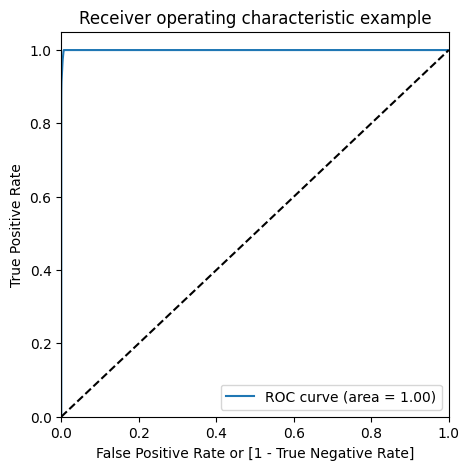

In [270]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on the test set

In [271]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [272]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56456   410]
 [   21    75]]


In [273]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [274]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9924335521926899
Sensitivity:- 0.78125
Specificity:- 0.9927900678788731


In [275]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.78      0.26        96

    accuracy                           0.99     56962
   macro avg       0.58      0.89      0.63     56962
weighted avg       1.00      0.99      0.99     56962



In [276]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [277]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8895962657827173

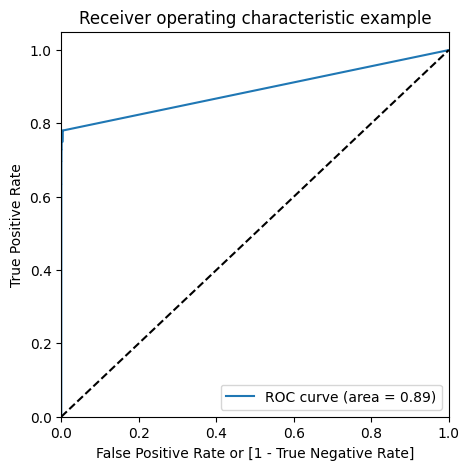

In [278]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:

- Accuracy = 0.99
- Sensitivity = 1.0
- Specificity = 0.99
- ROC-AUC = 1.0

Test set:

- Accuracy = 0.99
- Sensitivity = 0.78
- Specificity = 0.99
- ROC-AUC = 0.89

## SMOTE (Synthetic Minority Oversampling Technique)

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [279]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [280]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [281]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


### Logistic Regression

In [282]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [283]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.712148      0.058938         0.026219        0.011828    0.01   
1       0.731724      0.034142         0.025486        0.005640     0.1   
2       0.737807      0.024039         0.031555        0.000374       1   
3       0.741226      0.028151         0.028481        0.006436      10   
4       0.745518      0.027845         0.029867        0.008319     100   
5       0.749860      0.064145         0.036156        0.006045    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.989805           0.989796           0.989484   
1   {'C': 0.1}           0.989834           0.989807           0.989488   
2     {'C': 1}           0.989836           0.989807           0.989486   
3    {'C': 10}           0.989836           0.989807           0.989486   
4   {'C': 100}           0.989836           0.989807           0.989486   
5  {'C': 1000}           0.989836           0.989807           0.989486   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.989631           0.989910         0.989725        0.000150   
1           0.989632           0.989942         0.989741        0.000161   
2           0.989630           0.989944         0.989741        0.000162   
3           0.989630           0.989945         0.989741        0.000163   
4           0.989630           0.989945         0.989741        0.000163   
5           0.989630           0.989945         0.989741        0.000163   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.989758            0.989666   
1                1            0.989780            0.989686   
2                2            0.989781            0.989687   
3                5            0.989781            0.989687   
4                3            0.989781            0.989687   
5                4            0.989781            0.989687   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.989760            0.989841            0.989682   
1            0.989772            0.989853            0.989700   
2            0.989772            0.989852            0.989701   
3            0.989772            0.989852            0.989701   
4            0.989772            0.989852            0.989701   
5            0.989772            0.989852            0.989701   

   mean_train_score  std_train_score  
0          0.989741         0.000063  
1          0.989758         0.000060  
2          0.989758         0.000060  
3          0.989758         0.000060  
4          0.989758         0.000060  
5          0.989758         0.000060

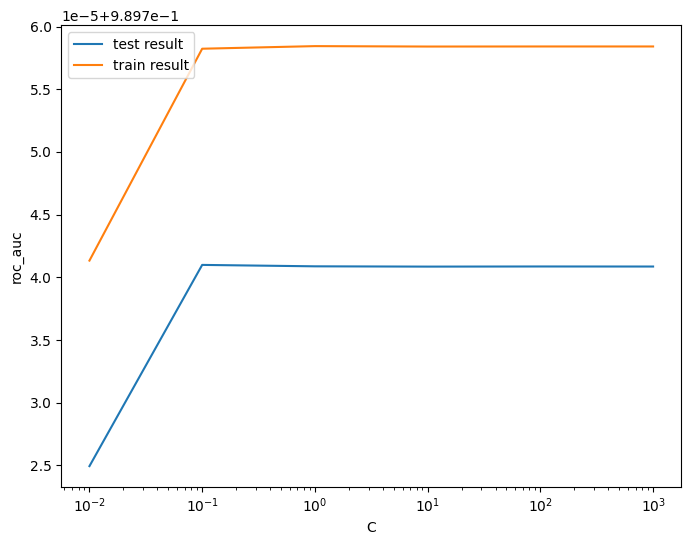

In [284]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [285]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1


 The highest test roc_auc is 0.9897409900830768 at C = 0.1

### Logistic regression with optimal C

In [286]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [287]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

#### Prediction on the train set

In [288]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [289]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221911   5538]
 [ 17693 209756]]


In [290]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [291]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9489314087993352
Sensitivity:- 0.9222111330452102
Specificity:- 0.9756516845534603


In [292]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [293]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

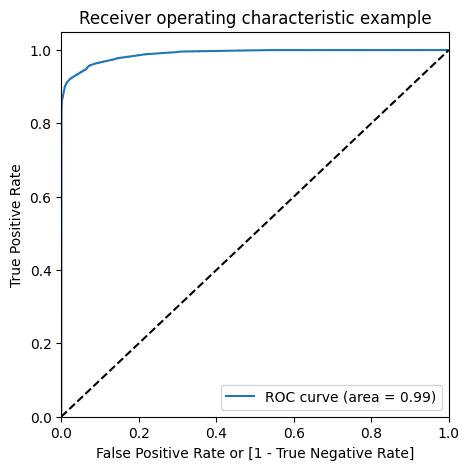

In [294]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

### Prediction on the test set

In [295]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [296]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55416  1450]
 [   10    86]]


In [297]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [298]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245


In [299]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [300]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

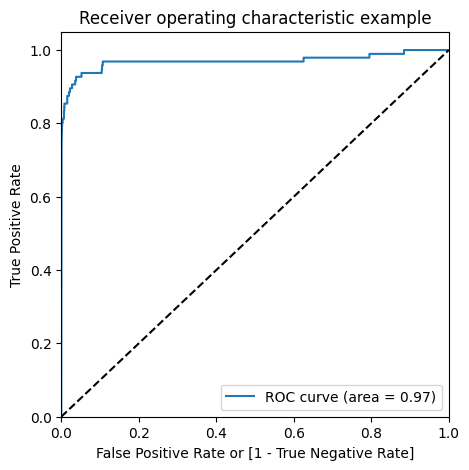

In [301]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:

- Accuracy = 0.95
- Sensitivity = 0.92
- Specificity = 0.97
- ROC = 0.99

Test set:

- Accuracy = 0.97
- Sensitivity = 0.90
- Specificity = 0.97
- ROC = 0.97

### XGBoost

In [302]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)  

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [303]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      22.521450      0.671514         0.116314        0.007117   
1      31.418081      0.055810         0.108231        0.001362   
2      37.396314      0.052617         0.125165        0.012488   
3      21.499536      0.194594         0.119100        0.006587   
4      31.188250      0.132063         0.114590        0.011952   
5      37.414922      0.112007         0.118624        0.006228   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999645   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999671   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999665   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999956   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999953   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999970   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999753           0.999685         0.999694        0.000045   
1           0.999738           0.999652         0.999687        0.000037   
2           0.999735           0.999648         0.999683        0.000038   
3           0.999950           0.999953         0.999953        0.000002   
4           0.999962           0.999959         0.999958        0.000004   
5           0.999958           0.999951         0.999960        0.000008   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999718            0.999736   
1                5            0.999733            0.999731   
2                6            0.999720            0.999723   
3                3            0.999979            0.999972   
4                2            0.999980            0.999981   
5                1            0.999985            0.999981   

   split2_train_score  mean_train_score  std_train_score  
0            0.999720          0.999725         0.000008  
1            0.999697          0.999721         0.000017  
2            0.999720          0.999721         0.000001  
3            0.999977          0.999976         0.000003  
4            0.999984          0.999982         0.000002  
5            0.999977          0.999981         0.000003

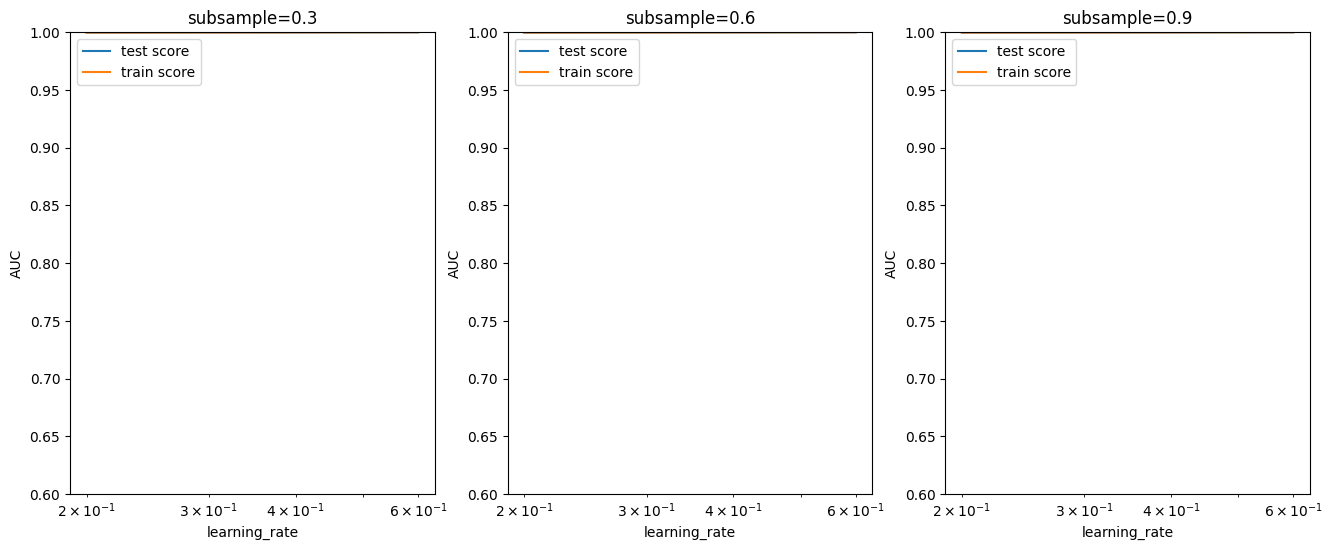

In [304]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [305]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [306]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

[18:03:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

#### Prediction on the train set

In [307]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [308]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[227447      2]
 [     0 227449]]


In [309]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [310]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999956034099952
Sensitivity:- 1.0
Specificity:- 0.9999912068199904


In [311]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [312]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [313]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

1.0

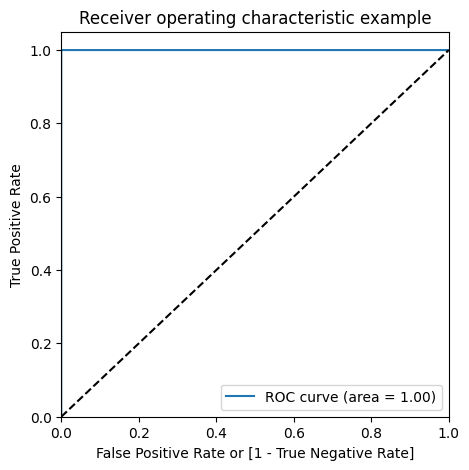

In [314]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Prediction on the test set

In [315]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [316]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56839    27]
 [   20    76]]


In [317]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [318]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9991748885221726
Sensitivity:- 0.7916666666666666
Specificity:- 0.9995251995920234


In [319]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.79      0.76        96

    accuracy                           1.00     56962
   macro avg       0.87      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [320]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [321]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9643800777265852

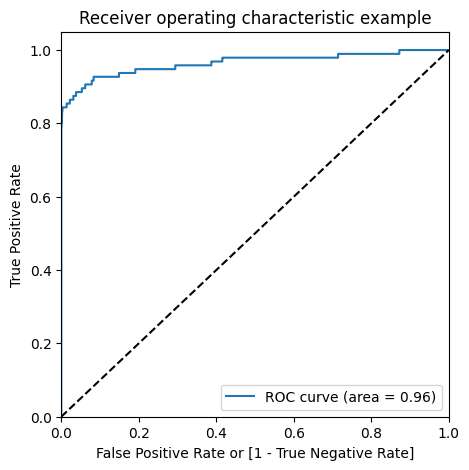

In [322]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:

- Accuracy = 0.99
- Sensitivity = 1.0
- Specificity = 0.99
- ROC-AUC = 1.0

Test set:

- Accuracy = 0.99
- Sensitivity = 0.79
- Specificity = 0.99
- ROC-AUC = 0.96

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [323]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [324]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.747413      0.057618         0.034628        0.002612   
1       4.698562      0.009229         0.032080        0.001186   
2       4.726096      0.011134         0.036677        0.007161   
3       4.728679      0.041885         0.036637        0.007241   
4       8.711128      0.103440         0.036678        0.007616   
5       8.668224      0.026637         0.034100        0.009921   
6       9.616735      1.133790         0.047732        0.002012   
7       8.914672      0.204719         0.032786        0.002516   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.986127   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.986127   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.986075   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.986053   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.998127   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.998169   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.998123   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.998116   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.985688           0.984838         0.985551        0.000535   
1           0.985690           0.984839         0.985552        0.000535   
2           0.985640           0.984775         0.985496        0.000540   
3           0.985636           0.984774         0.985488        0.000533   
4           0.998149           0.998015         0.998097        0.000059   
5           0.998149           0.997953         0.998090        0.000097   
6           0.998075           0.997941         0.998046        0.000077   
7           0.998083           0.997914         0.998038        0.000088   

   rank_test_score  
0                6  
1                5  
2                7  
3                8  
4                1  
5                2  
6                3  
7                4

In [325]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9980970959604406
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [410]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [411]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [412]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[223809   3640]
 [  2374 225075]]


In [413]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [414]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561


In [415]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



In [416]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [417]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9986355757920081

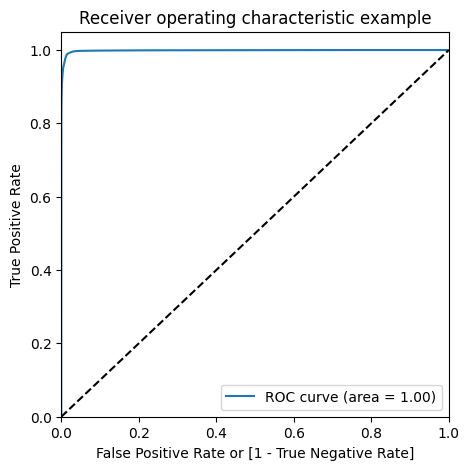

In [418]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Prediction on the test set

In [419]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [420]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55852  1014]
 [   19    77]]


In [421]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [422]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326


In [423]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [424]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [425]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8551876157692353

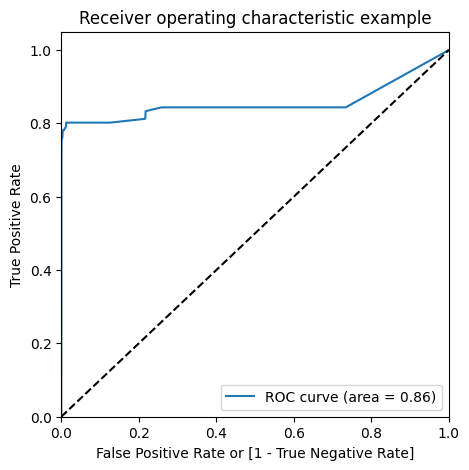

In [426]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:

- Accuracy = 0.99
- Sensitivity = 0.99
- Specificity = 0.98
- ROC-AUC = 1.0

Test set:

- Accuracy = 0.98
- Sensitivity = 0.80
- Specificity = 0.98
- ROC-AUC = 0.86

### AdaSyn (Adaptive Synthetic Sampling)

In [427]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [428]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [429]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


### Logistic Regression

In [430]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [431]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.565067      0.052319         0.042070        0.007344    0.01   
1       0.574844      0.027690         0.038757        0.006574     0.1   
2       0.602600      0.041318         0.042024        0.007345       1   
3       0.599636      0.022310         0.044712        0.003091      10   
4       0.598111      0.012982         0.040772        0.006677     100   
5       0.610484      0.009921         0.047038        0.000173    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.963472           0.962327           0.963273   
1   {'C': 0.1}           0.963578           0.962435           0.963370   
2     {'C': 1}           0.963585           0.962442           0.963376   
3    {'C': 10}           0.963585           0.962443           0.963377   
4   {'C': 100}           0.963585           0.962443           0.963377   
5  {'C': 1000}           0.963585           0.962443           0.963377   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.963024        0.000499                6            0.962770   
1         0.963128        0.000497                5            0.962881   
2         0.963134        0.000497                4            0.962890   
3         0.963135        0.000496                3            0.962891   
4         0.963135        0.000496                2            0.962891   
5         0.963135        0.000496                1            0.962891   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.963211            0.963172          0.963051         0.000199  
1            0.963305            0.963272          0.963153         0.000192  
2            0.963312            0.963278          0.963160         0.000191  
3            0.963312            0.963279          0.963161         0.000191  
4            0.963312            0.963279          0.963161         0.000191  
5            0.963312            0.963279          0.963161         0.000191

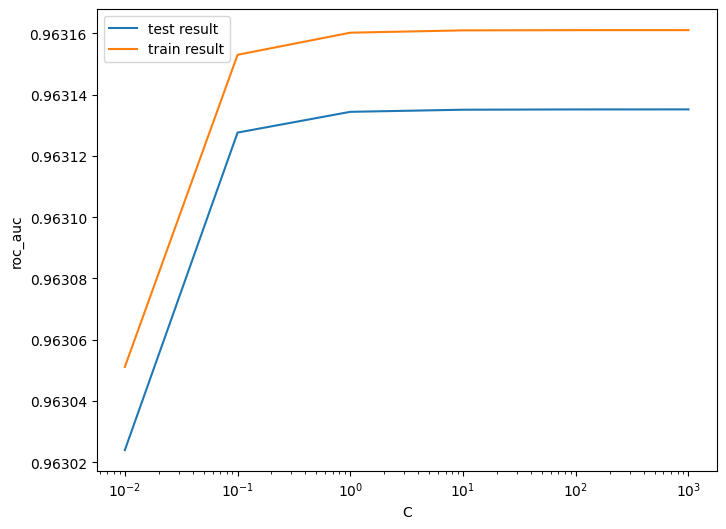

In [432]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [433]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.963135148223901 at C = 1000


#### Logistic regression with optimal C

In [434]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [435]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

#### Prediction on the train set

In [436]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [437]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[207019  20430]
 [ 31286 196162]]


In [438]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [439]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.8863127257379143
Sensitivity:- 0.862447680348915
Specificity:- 0.9101776662020936
F1-Score:- 0.8835330150436899


In [440]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



In [441]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [442]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9631610160068507

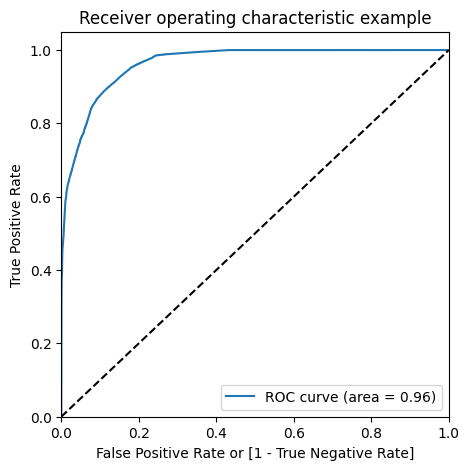

In [443]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

### Prediction on the test set

In [444]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [445]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[51642  5224]
 [    4    92]]


In [446]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [447]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9082195147642288
Sensitivity:- 0.9583333333333334
Specificity:- 0.9081349136566665


In [448]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [449]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [450]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9671573487086602

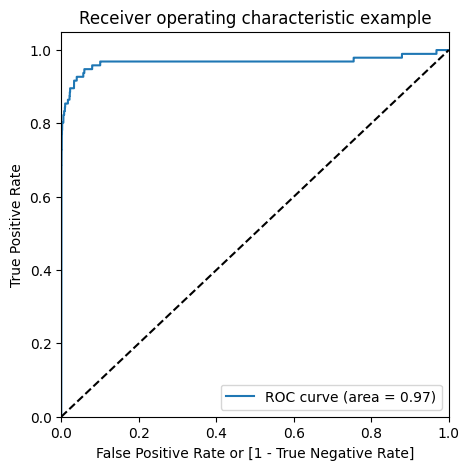

In [451]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:

- Accuracy = 0.88
- Sensitivity = 0.86
- Specificity = 0.91
- ROC = 0.96

Test set:

- Accuracy = 0.90
- Sensitivity = 0.95
- Specificity = 0.90
- ROC = 0.97

### Decision Tree

In [452]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [453]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.937105      0.128764         0.032485        0.001279   
1       4.659693      0.018607         0.031270        0.000029   
2       4.679241      0.056949         0.031253        0.000002   
3       4.628558      0.063195         0.031495        0.000286   
4       8.311091      0.203150         0.032317        0.001100   
5       8.291263      0.149646         0.036719        0.007468   
6       8.224760      0.098445         0.035028        0.004838   
7       8.312053      0.169917         0.036455        0.007365   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902958   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902958   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.902958   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.902958   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.933881   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.935319   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.936156   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.937606   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.920356           0.909332         0.910882        0.007187   
1           0.920355           0.909339         0.910884        0.007186   
2           0.920310           0.913996         0.912421        0.007171   
3           0.920316           0.912920         0.912065        0.007112   
4           0.946929           0.938678         0.939829        0.005389   
5           0.946357           0.935574         0.939083        0.005144   
6           0.945638           0.940152         0.940649        0.003887   
7           0.945550           0.939764         0.940974        0.003354   

   rank_test_score  
0                8  
1                7  
2                5  
3                6  
4                3  
5                4  
6                2  
7                1

In [454]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9409736585568339
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [455]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

#### Prediction on the train set

In [456]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [457]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[215929  11520]
 [  1118 226330]]


In [458]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [459]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9722178866864367
Sensitivity:- 0.9950845907636031
Specificity:- 0.9493512831447929


In [460]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



In [461]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [462]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9917591040224101

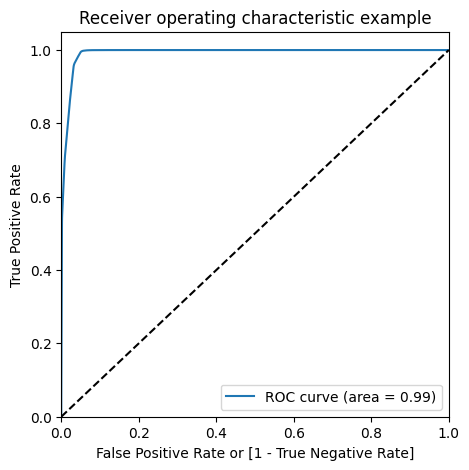

In [379]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Prediction on the test set

In [463]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [464]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[53880  2986]
 [   15    81]]


In [465]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [466]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419


In [467]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [468]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [469]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9141440147305362

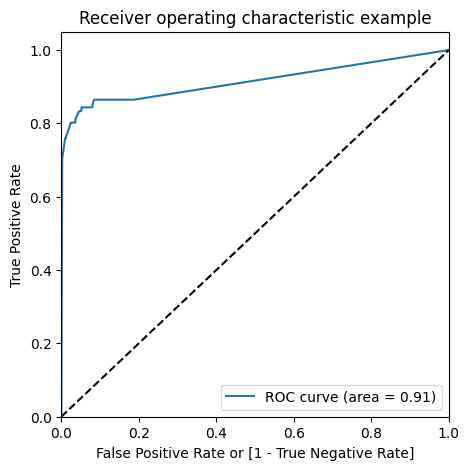

In [470]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:
    
- Accuracy = 0.97
- Sensitivity = 0.99
- Specificity = 0.95
- ROC-AUC = 0.99

Test set:
    
- Accuracy = 0.95
- Sensitivity = 0.84
- Specificity = 0.95
- ROC-AUC = 0.91

### XGBoost

In [471]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [472]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      17.039123      2.329868         0.088926        0.007366   
1      29.055981      1.237194         0.111926        0.013119   
2      36.401468      0.530660         0.110073        0.000232   
3      20.900381      0.262968         0.108239        0.004683   
4      30.626446      0.079865         0.115263        0.007784   
5      36.694836      0.066753         0.120321        0.007468   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.975756   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.978500   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.977110   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.978961   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.971621   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.977356   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.996202           0.994729         0.988896        0.009310   
1           0.996075           0.993204         0.989260        0.007698   
2           0.996104           0.993729         0.988981        0.008450   
3           0.998145           0.997984         0.991697        0.009006   
4           0.996825           0.997544         0.988663        0.012054   
5           0.998183           0.995571         0.990370        0.009264   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.999304            0.999014   
1                3            0.999295            0.999072   
2                4            0.999300            0.999069   
3                1            0.999915            0.999934   
4                6            0.999950            0.999942   
5                2            0.999953            0.999935   

   split2_train_score  mean_train_score  std_train_score  
0            0.999315          0.999211         0.000139  
1            0.999224          0.999197         0.000093  
2            0.999194          0.999188         0.000095  
3            0.999951          0.999933         0.000015  
4            0.999947          0.999946         0.000003  
5            0.999955          0.999948         0.000009

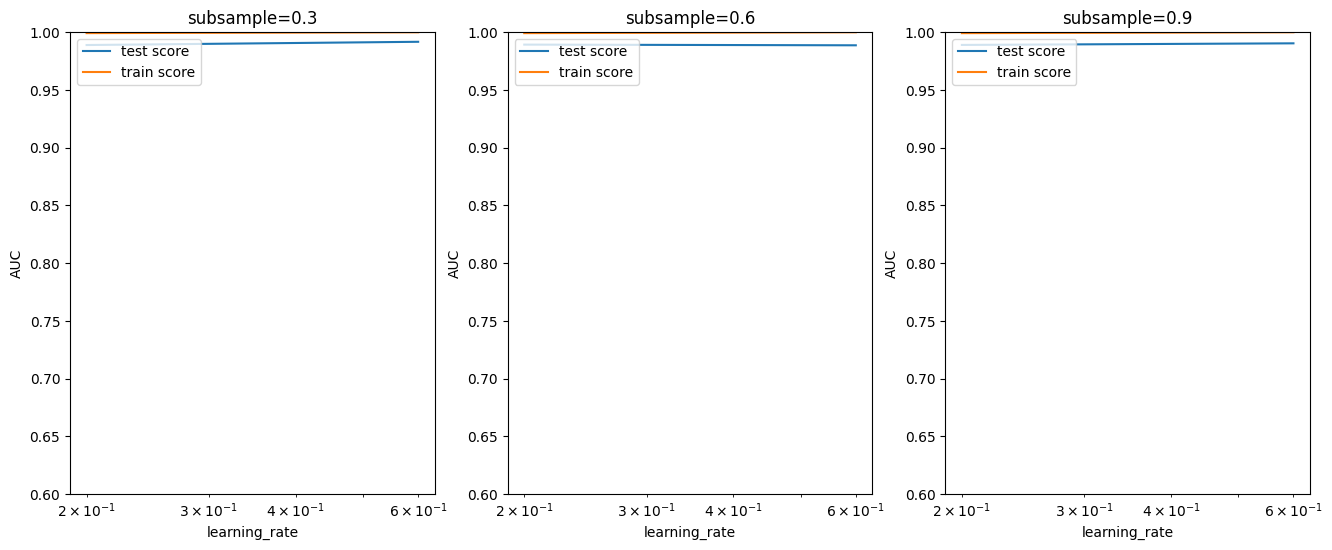

In [473]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [474]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [475]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

[19:02:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor=None, ...)

#### Prediction on the train set

In [476]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [477]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227449      0]
 [     0 227448]]


In [478]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [479]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999956034003302
Sensitivity:- 1.0
Specificity:- 1.0


In [480]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



In [481]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [482]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

1.0

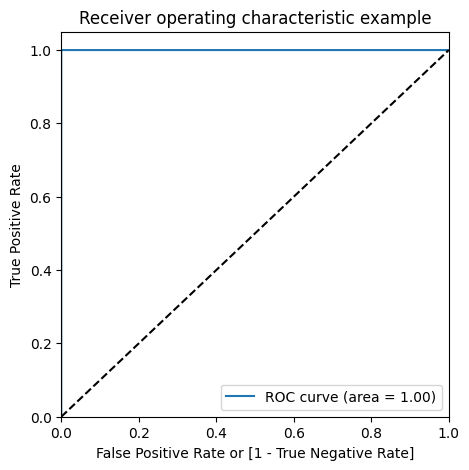

In [483]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Prediction on the test set

In [484]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [485]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56825    41]
 [   21    75]]


In [486]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [487]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9989115550718023
Sensitivity:- 0.78125
Specificity:- 0.9992790067878873


In [488]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.78      0.71        96

    accuracy                           1.00     56962
   macro avg       0.82      0.89      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [489]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [490]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9599178331516196

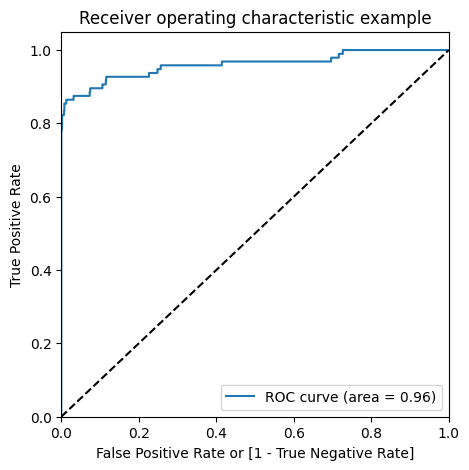

In [491]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set:
    
- Accuracy = 0.99
- Sensitivity = 1.0
- Specificity = 1.0
- ROC-AUC = 1.0

Test set:
    
- Accuracy = 0.99
- Sensitivity = 0.78
- Specificity = 0.99
- ROC-AUC = 0.96

### Choosing best model on the balanced data

Here we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasyn. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model.

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the Logistic regression model with SMOTE is the best model for its simlicity and less resource requirement.

### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [492]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9897539730582245
Threshold= 0.5311563616125257


We can see that the threshold is 0.53, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

### Cost benefit analysis

We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high.

### Summary to the business

For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.